# Rutwick Bhawsar | Shivang Arya
## Business Data Science | Fall 2019
<br>
Programming Questions

### Question 1. Correlation

In [238]:
### Part 1
### We first read all the data in a DataFrame

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('DF1', sep=',')
df.index = df['Unnamed: 0']
df= df[['0','1','2','3']]
df.head(10)

,0,1,2,3
Unnamed: 0,,,,
0,1.038502,0.899865,0.835053,-0.971528
1,0.320455,-0.647459,0.149079,0.352593
2,0.055480,2.234771,0.271672,-2.108739
3,-0.007260,-0.524299,-0.126550,0.670827
4,-1.237390,-1.377017,-1.049932,1.342079
5,0.477841,0.032660,0.336723,-0.171675
6,-0.486923,-1.128336,-0.459850,1.113013
7,0.313020,0.677323,0.123082,-0.617958
8,0.919790,-0.539665,0.956577,0.821389


In [239]:
### Getting the correlation matrix

df.corr()

,0,1,2,3
0,1.000000,-0.003998,0.990066,0.004111
1,-0.003998,1.000000,-0.004085,-0.990235
2,0.990066,-0.004085,1.000000,0.004067
3,0.004111,-0.990235,0.004067,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDBBC3D3C8>,
      dtype=object)

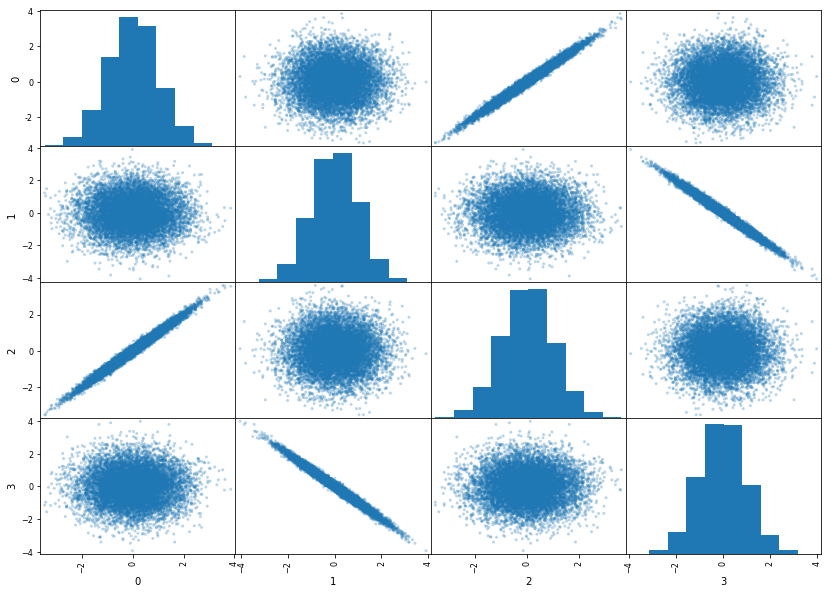

In [240]:
### Plotting a scatter plot for correlation matrix using pandas library

from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(14,10), alpha =0.3)

In [241]:
### Using Seaborn library to plot the scatter plot of the correlation matrix.

import seaborn as sns
sns.set(style="darkgrid")

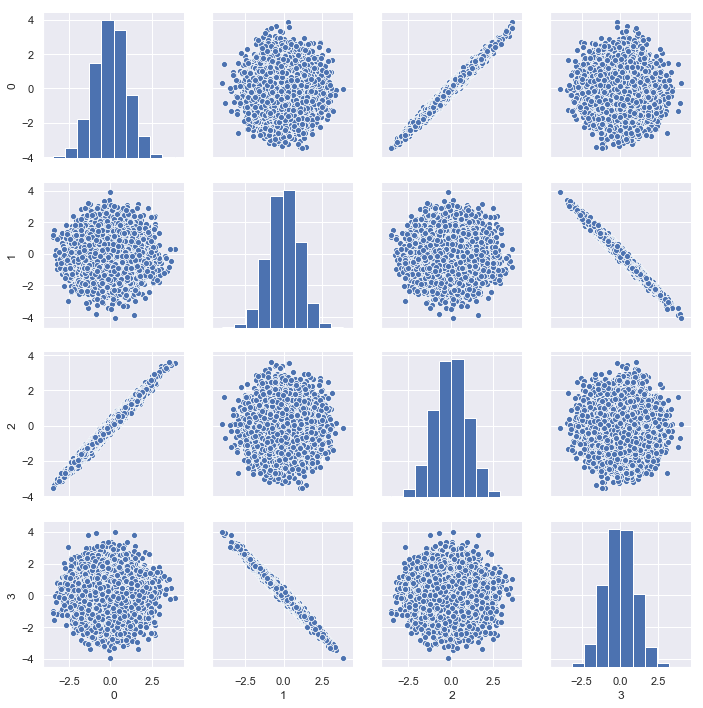

In [242]:
sns.pairplot(df)

In [243]:
### Finding the covariance matrix

### Covariance is a measure of the joint variability of two random variables.
### Here we are finding the joint variability between 2 columns of the Data.

### A Covariance Matrix for our DateFrame is a matrix whose element in the i, j position is 
### the covariance between the i-th and j-th column of our DataFrame. 

### Example if Cov(2,3)=0.004081 mean that the Covariance between column 2 and 3 is 0.004081
### and the value of [2,3] in the matrix will be 0.004081

covariancemat = df.cov()
covariancemat

,0,1,2,3
0,1.001558,-0.004012,0.991624,0.004125
1,-0.004012,1.005378,-0.004099,-0.995457
2,0.991624,-0.004099,1.001589,0.004081
3,0.004125,-0.995457,0.004081,1.005168


In [244]:
### Covariance between column 0 and column 2 is positive and really high. 
### This is exactly what the scatteplot shows.  
### The relationship is linear with a positive slope.

### Covariance between column 1 and column 3 is negative and really high. 
### The relationship shown is linear with a negative slope.

### Covariance for the remaining pair of column is minimal. 
### We can see that in the plot, there is no relationship between the columns and the points are scattered. 

In [245]:
### Question 1 Part 3.

mean = (0,0,0)
cov = np.array([[1, 0,0], [0,1,0.8],[0,0.8,1]])
mugd=np.array([])
vari=np.array([])

### We can see that for a sample size of 2000
### The values of Cij (Covariance between column 2 and 3) converges to the given value of 0.8

for i in range(2000):
    y=np.random.multivariate_normal(mean, cov, size=((i+2),))
    mugd = np.append(mugd,y)
    cov_matrix = np.cov(y, rowvar=False)
    c=cov_matrix[1][2]
    vari = np.append(vari,c)
vari

array([0.07325209, 0.97060459, 0.19036198, ..., 0.8183885 , 0.83554192,
       0.77478329])

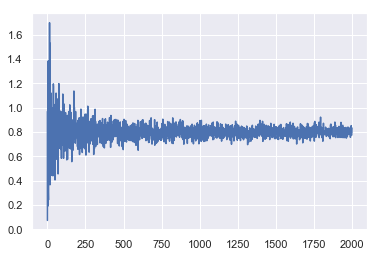

In [246]:
plt.plot(vari)
plt.show()

### Question 3. Even More Standard Error

In [261]:
from sklearn import datasets, linear_model
import math
import seaborn as sns

In [262]:
# Taking random normal distributions for X and Errors and calculating y using the given coefficients.

n=100
x=np.random.normal(0,1,n)
e=np.random.normal(0,1,n)
b0=-3
b=0
y=b0+x*b+e
y

array([-3.52824037, -2.51422528, -3.67653582, -3.8468649 , -2.85866643,
       -2.26114074, -3.11027626, -3.52899492, -4.13515218, -3.53716198,
       -3.68781526, -3.45028551, -3.78984414, -1.99306273, -4.93411093,
       -2.28132885, -4.2448926 , -3.2427067 , -2.7187977 , -3.6456571 ,
       -4.23053345, -4.62519123, -5.48944896, -3.19906508, -4.67125363,
       -2.77846884, -2.6831203 , -2.93411974, -3.62664446, -3.19001788,
       -3.95854943, -3.53092293, -2.72543544, -2.91104529, -3.4931933 ,
       -2.97079336, -4.05103429, -1.03544318, -2.42428099, -2.88016669,
       -2.89471049, -1.75847367, -4.13042585, -2.64999539, -1.74836417,
       -2.13145913, -3.42538608, -3.85777794, -2.51890745, -3.10253371,
       -5.06947894, -2.64344629, -3.16820852, -3.85722405, -1.97732309,
       -2.88184097, -1.71694928, -3.57961676, -1.03454131, -2.01306005,
       -2.88642541, -2.97217819, -1.6020877 , -3.76025416, -2.42028087,
       -2.76611679, -4.1560317 , -1.89486191, -4.19955434, -1.86

In [263]:
# fitting a linear model to predict y based on the change in x. 
# The coefficient of x we gave for calculating y was 0 however, the output does show some value of the coefficient.
# This has to be because of the error term.
lr = linear_model.LinearRegression()
lr.fit(x.reshape(-1, 1),y)
print (lr.coef_, lr.intercept_)

[-0.00246017] -3.159880901833685


In [265]:
# We got b = 0.008 after fitting the linear regression model which is close to 0 
# but does define a relationship between x and y which ideally does not exist. 
# The value of b we get is NOT statistically meaningful for most cases because in reality the variables are totally unrelated.

In [264]:
# Calculating the standard deviation of error in b that is b(calculated) - b(given) 
n=int(input("Enter the Number of times you want to calculate the empirical standard deviation of the coefficient of x: "))
error=np.array([])
for i in range(n):
    samples=100
    x=np.random.normal(0,1,samples)
    e=np.random.normal(0,1,samples)
    b0=-3
    b=0
    y=b0+x*b+e
    lr = linear_model.LinearRegression()
    lr.fit(x.reshape(-1, 1),y)
    error=np.append(error,(lr.coef_-b))
print(error)
np.std(error)

Enter the Number of times you want to calculate the empirical standard deviation of the coefficient of x: 200
[ 7.17135635e-02  1.18344710e-02  1.62010453e-01 -1.79161199e-01
  2.73033691e-01  1.68333144e-01  1.28291644e-01 -9.46462813e-02
  1.58747323e-02 -5.76824690e-03  6.28355457e-02  8.96739451e-02
 -7.46908357e-02  8.27996357e-02 -1.59839782e-01 -7.39226648e-02
  8.08573784e-02 -3.98654552e-02 -1.77017573e-01 -5.88828079e-03
 -2.40669410e-02  1.05945562e-01  2.80592015e-02 -9.22863545e-02
 -4.02717622e-02 -7.96353336e-02 -4.60792011e-02  1.49274812e-01
  1.79297632e-01  7.69187677e-03  8.01637609e-02 -5.74573041e-02
  1.61246903e-01  1.79934092e-01 -1.41241198e-01  7.22809378e-02
  6.64717092e-02  1.24814643e-01  8.76908783e-02 -7.94029963e-02
  7.39142351e-02  1.53781786e-01  1.39028195e-01 -1.40134281e-01
  6.34361596e-02  5.41418103e-02 -9.95397875e-02  1.17287112e-01
  7.68067943e-02 -6.22297683e-02  8.58658057e-02  7.41380972e-02
 -1.07199986e-01  7.35400753e-02  1.08165843e

0.10446607978153859

In [266]:
# In case the regression coefficient of x is -0.15, the standard deviation we calculated implies that -
# The value -0.15 is not significant as the absolute value of standard deviation is almost as much as the absolute value 
# of the coefficient. Also, 3 standard deviations span more than the entire range of the error in beta whereas it should span
# around 99.98% of the data

In [267]:
ranges=np.array([error.min(),error.max()])
print(ranges)
error.mean()

[-0.32526587  0.27303369]


0.011611562260196202

In [268]:
#Linear Regression of y vs noise
n=int(input("Enter the Number of times you want to calculate the empirical standard deviation of the coefficient of error term: "))
error=np.array([])
for i in range(n):
    samples=100
    x=np.random.normal(0,1,samples)
    e=np.random.normal(0,1,samples)
    b0=-3
    b=0
    y=b0+x*b+e
    lr = linear_model.LinearRegression()
    lr.fit(e.reshape(-1, 1),y)
    error=np.append(error,(lr.coef_-b))
print (lr.coef_, lr.intercept_)
np.std(error)

Enter the Number of times you want to calculate the empirical standard deviation of the coefficient of error term: 275
[1.] -2.999999999999999


2.8396150192137527e-16

In [269]:
# Linear Regression of y with noise when y is entirely unrelated to x will give a coefficient of 1.
# This is because the change is y is only because of the change in the error term.
# Hence, the standard deviation of the coefficient of error term is negligible.

In [270]:
# In this case, since y is not related to x, change in y will depend entirely on the change in error term.
# Here, the term b=-0.15 seems implausible.
# However, if we consider this b term as the coefficient of x instead of noise, the numbers make more sense.

In [271]:
n=int(input("Enter the Number of times you want to calculate the empirical standard deviation of the coefficient of x: "))
error=np.array([])
stdev=np.array([])
for i in range(n):
    samples=100
    x=np.random.normal(0,1,samples)
    e=np.random.normal(0,1,samples)
    b0=-3
    b=0
    y=b0+x*b+e
    lr = linear_model.LinearRegression()
    lr.fit(x.reshape(-1, 1),y)
    error=np.append(error,(lr.coef_-b))
    stdev=np.append(stdev,np.std(error))
    
print (lr.coef_, lr.intercept_)
index=list(range(1,n+1))
nroot=[1/np.sqrt(i) for i in index]
print("\n\n Error:",error)
print("\n\n Standard deviation of error terms:",error)

Enter the Number of times you want to calculate the empirical standard deviation of the coefficient of x: 200
[0.17971612] -2.9716778322303488


 Error: [-0.1996993   0.1118794  -0.08789808 -0.12302145  0.09804391  0.09561897
 -0.07213699  0.18076346  0.09069182 -0.00880513  0.00429916 -0.03488836
 -0.17613716  0.09501221 -0.08182887 -0.03750523 -0.27776853  0.0555969
  0.04989923 -0.02939664  0.08371127  0.02028787  0.0137338  -0.06811279
  0.04173209 -0.07494716 -0.08004519  0.06066219 -0.17831577  0.06245617
 -0.01156578 -0.12737405 -0.12234107 -0.02940699  0.06253375 -0.00946565
  0.0518822   0.25543305  0.04467072 -0.03278107  0.06696318 -0.13271742
  0.0196353   0.08051214 -0.00932072  0.00937457  0.08083288 -0.25656832
  0.08282058  0.08872568  0.14591387 -0.0915604   0.06004867  0.15124276
  0.04130128  0.1878352  -0.07635281  0.23207529 -0.0690406   0.20128543
 -0.19301129 -0.00712424 -0.03379076 -0.0236986  -0.02070772  0.07163464
  0.07114967  0.00350452  0.06628824  0.04790

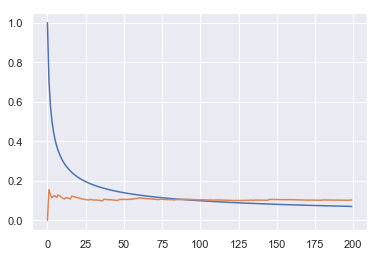

In [272]:
plt.plot(nroot)
plt.plot(stdev)

In [273]:
# The standard deviation of the coefficient of X terms should be equal to 0 
# This is because the coefficient of X is supposed to be 0. 
# Compared to the plot of 1/squareroot(n), the standard deviation should be the squared difference of expected and actual 
# value of error term divided by the square root of n.

# Considering the values of error term (as seen above) are really small, the graph should be a good fit 
# However, we expect the standard deviation of error term to follow the same direction as the square root of n

# But we observe that the standard deviation decreases after the first maxima and then gradually increases.
# Hence, we conclude that this graph is not a good fit (for n approximately greater than 25) because of the gradual increase

# The gradual increase implies that the variance of error is increasing with an incerase in n.
# Therefore confirming that the error term is unpredicatable. 

### Question 4. Names and Frequencies

In [247]:
### We first read all the txt files into 1 DataFrame.
### We do this using os.

import os
path = os.getcwd()+'/Names'
text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
new_text = ["Names/" +s for s in text_files]
    
df = pd.concat([pd.read_csv(item, names=[item[9:-4]]) for item in new_text], axis=1)

In [235]:
### Verifying whether we got all the text files. 

df.sort_values(by=['2014'], ascending = False).head(10)

,,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,index
Emma,F,2003.0,2034.0,2303.0,2367.0,2587.0,2728.0,2764.0,2647.0,3087.0,2884.0,...,18365.0,18803.0,17883.0,17327.0,18781.0,20914.0,20905.0,20886.0,20355.0,"(Emma, F)"
Olivia,F,44.0,51.0,52.0,46.0,54.0,59.0,72.0,69.0,71.0,100.0,...,16573.0,17072.0,17425.0,17017.0,17305.0,17296.0,18397.0,19761.0,19553.0,"(Olivia, F)"
Noah,M,103.0,81.0,108.0,81.0,94.0,76.0,90.0,94.0,83.0,85.0,...,16585.0,15778.0,17231.0,16438.0,16845.0,17323.0,18206.0,19229.0,19511.0,"(Noah, M)"
Sophia,F,138.0,122.0,179.0,159.0,170.0,185.0,218.0,192.0,251.0,251.0,...,17018.0,16075.0,16929.0,20623.0,21824.0,22279.0,21171.0,18563.0,17327.0,"(Sophia, F)"
Liam,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5135.0,5976.0,8560.0,10924.0,13431.0,16785.0,18111.0,18421.0,18281.0,"(Liam, M)"
Mason,M,22.0,13.0,12.0,12.0,14.0,15.0,18.0,13.0,14.0,21.0,...,10761.0,10474.0,10677.0,14836.0,19493.0,18953.0,17668.0,17157.0,16535.0,"(Mason, M)"
Isabella,F,50.0,50.0,44.0,54.0,76.0,48.0,80.0,58.0,63.0,80.0,...,19130.0,18607.0,22283.0,22890.0,19882.0,19082.0,17599.0,17027.0,15504.0,"(Isabella, F)"
Jacob,M,404.0,381.0,390.0,356.0,381.0,343.0,346.0,317.0,353.0,295.0,...,24259.0,22574.0,21154.0,22095.0,20349.0,19045.0,18110.0,16812.0,15816.0,"(Jacob, M)"
William,M,9531.0,8524.0,9298.0,8387.0,8897.0,8044.0,8252.0,7470.0,8705.0,7772.0,...,18876.0,18383.0,17905.0,17036.0,17325.0,16856.0,16595.0,16776.0,15809.0,"(William, M)"
Ethan,M,NaN,NaN,7.0,NaN,10.0,NaN,6.0,7.0,NaN,NaN,...,21016.0,20198.0,19836.0,17993.0,16674.0,17644.0,16216.0,15691.0,14991.0,"(Ethan, M)"


In [151]:
df.loc['Constantine','2000':]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
M,39.0,41.0,46.0,46.0,56.0,87.0,88.0,108.0,105.0,82.0,105.0,91.0,106.0,97.0,112.0,91.0


In [248]:
### Question 4 Part 1

k = int(input("Enter k please: "))
year = input("Enter XXXX (year) please: ")

### Get top k names from the year XXXX.

df.loc[:,year].sort_values(ascending= False).head(k)

Enter k please: 10
Enter XXXX (year) please: 2007


Jacob        M    24259.0
Michael      M    21972.0
Ethan        M    21016.0
Joshua       M    20642.0
Daniel       M    20239.0
Christopher  M    19999.0
Anthony      M    19614.0
Emily        F    19350.0
Isabella     F    19130.0
William      M    18876.0
Name: 2007, dtype: float64

In [251]:
### Question 4 Part 2
### Get Frequency for Name

name = input("Enter Name: ")
if(name in df.index):
    print(df.loc[name,:].sum(axis=1))
else:
    print("No entries with the name exist ")

Enter Name: Shivang
M    41.0
dtype: float64


In [250]:
### These are the most popular names in the year 1880
### You can choose any of them for the next cell and see the absolute and relative frequency over the years. 

df.loc[:,'1880'].sort_values(ascending= False).head(20)

John       M    9655.0
William    M    9531.0
Mary       F    7065.0
James      M    5927.0
Charles    M    5348.0
George     M    5126.0
Frank      M    3242.0
Joseph     M    2632.0
Anna       F    2604.0
Thomas     M    2534.0
Henry      M    2444.0
Robert     M    2415.0
Edward     M    2364.0
Harry      M    2152.0
Emma       F    2003.0
Elizabeth  F    1939.0
Walter     M    1755.0
Minnie     F    1746.0
Arthur     M    1599.0
Margaret   F    1578.0
Name: 1880, dtype: float64

Enter Name: Arthur
1880    1604.0
1881    1575.0
1882    1691.0
1883    1596.0
1884    1697.0
1885    1526.0
1886    1664.0
1887    1498.0
1888    1718.0
1889    1677.0
1890    1618.0
1891    1521.0
1892    1777.0
1893    1645.0
1894    1718.0
1895    1674.0
1896    1831.0
1897    1653.0
1898    1626.0
1899    1368.0
1900    1870.0
1901    1336.0
1902    1492.0
1903    1440.0
1904    1504.0
1905    1519.0
1906    1494.0
1907    1566.0
1908    1612.0
1909    1671.0
         ...  
1986    1584.0
1987    1571.0
1988    1566.0
1989    1541.0
1990    1549.0
1991    1487.0
1992    1419.0
1993    1245.0
1994    1167.0
1995    1111.0
1996    1008.0
1997     973.0
1998     982.0
1999     874.0
2000     915.0
2001     879.0
2002     844.0
2003     795.0
2004     792.0
2005     830.0
2006     792.0
2007     818.0
2008     862.0
2009     811.0
2010     727.0
2011     890.0
2012     865.0
2013    1026.0
2014    1143.0
2015    1232.0
Length: 136, dtype: float64


The frequency graph for the name  Ar

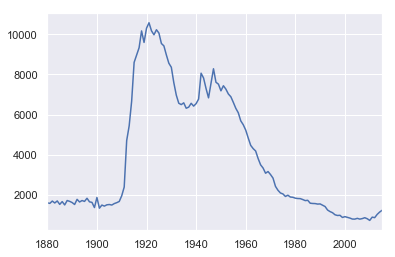

In [252]:
### Get absolute frequency of the Name per year

name = input("Enter Name: ")
if(name in df.index):
    plotdf = df.loc[name,:].sum(axis=0)
    print(plotdf)
    print("\n\nThe frequency graph for the name ",name," over 136 year\n")
    plotdf.plot(label = name)
else:
    print("No entries with the name exist ")

Enter Name: Arthur

[ -29.  116.  -95.  101. -171.  138. -166.  220.  -41.  -59.  -97.  256.
 -132.   73.  -44.  157. -178.  -27. -258.  502. -534.  156.  -52.   64.
   15.  -25.   72.   46.   59.  285.  433. 2318.  731. 1228. 1935.  358.
  371.  839. -573.  707.  274. -402. -199.  252. -166. -520. -118. -452.
 -412. -202. -764. -622. -406.  -68.   88. -269.   54.  192. -140.  124.
  226. 1290. -240. -523. -465.  735.  714. -673.  -95. -331.  253. -169.
 -242. -137. -281. -296. -222. -403. -193. -268. -389. -370. -163. -119.
 -375. -314. -160. -258.   83. -149. -177. -413. -194. -135.  -47. -126.
   61.  -90.  -12.  -45.  -17.   -5.  -46.  -53.   16. -146.  -13.   -5.
  -25.    8.  -62.  -68. -174.  -78.  -56. -103.  -35.    9. -108.   41.
  -36.  -35.  -49.   -3.   38.  -38.   26.   44.  -51.  -84.  163.  -25.
  161.  117.   89.]


Plotting the relative frequency of  Arthur  over 136 years


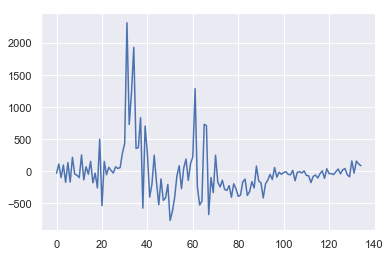

In [253]:
### Question 4 Part 3.

### Get relative frequency of the Name per year.
### Plotting the reltive frequency of a name over 136 years. 

name = input("Enter Name: ")
if(name in df.index):
    plotdf = df.loc[name,:].sum(axis=0)
    dfname = pd.DataFrame(plotdf)
    print()
    val=dfname.iloc[0:1,0].values
    nextthing=np.array([])
    for i in dfname.iloc[1:,0].values:
        
        ### We are calculating the relative frequency by subtrating two consecutive years. 
        
        temp=i-val
        val=i
        nextthing=np.append(nextthing,temp)
    print(nextthing)
    plt.plot(nextthing)
    print("\n\nPlotting the relative frequency of ",name," over 136 years")
    plt.show()
else:
    print("No entries with the name exist ")


In [254]:
### Question 4 Part 4.

### We are extrating all the names which have 'M' and 'F' to a new DataFrame
### We are parsing through all the rows within our DataFrame 
### Using the for loop and choosing only those that satisy the criteria. 

df2 = df.iloc[0:1,:]
df['index'] = df.index
df.loc[:,'index'][1][0]
j=0
for i in range(df.shape[0]-2):
    if(df.loc[:,'index'][i][0] == df.loc[:,'index'][i+1][0]):
        df2 = df2.append(df.iloc[i:i+2,:].copy())

### This cell takes a while for processing. Around 6 minutes.

C:\Users\rutwi\Anaconda_3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [255]:
df3 = df2.iloc[1:,:-1]
df3 = df3.fillna(value=0)

### This is the DataFrame in which only the names which have a 'M' and 'F' are included.
### We have replaces the NaN values with 0 to helpwith computation. 

df3

            
    

1880  1881  1882   1883  1884  1885  1886  1887  1888  1889  ...  \
Aaden   F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aadi    F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aadyn   F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aalijah F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aaliyah F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aamari  F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aamir   F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aaren   F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aareon  F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aari    F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aarian  F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aarin   F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aarion  F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aaris   F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Aaron   F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M  102.0  94.0  85.0  105.0  97.0  88.0  86.0  78.0  90.0  85.0  ...   
...          ...   ...   ...    ...   ...   ...   ...   ...   ...   ...  ...   
Zonnie  F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zora    F   28.0  21.0  32.0   35.0  58.0  48.0  52.0  46.0  42.0  53.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zuri    F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zuriah  F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zuriel  F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zy      F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zyah    F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zyair   F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zyaire  F    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
        M    0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
Zyan    F   

In [256]:
### We are iterating through all rows and all columns of the DataFrame. 
### We check whether a frequency has changed over the years. 
### Example if the name 'Aaliyah' was more popular as a Female first and then became popular as a Male 
### We then extract 'Aaliyah' and put it in a list.

dfswitchnames = ['']
flag=0
for i in range(0,df3.shape[0]-1,2):
    flag=0
    for j in range(df3.shape[1]):
        #print(df3.iat[i,j]," ",df3.iat[i+1,j])
        if(flag == 0 and df3.iat[i,j]>df3.iat[i+1,j]):
            flag = 1;
            #print(df3.index[i][0], " Was Female in ", df3.columns[j])
            continue;
        if(flag == 0 and df3.iat[i,j]<df3.iat[i+1,j]):
            #print(df3.index[i][0], " Was Male in ", df3.columns[j])
            flag = -1;
            continue;  
        if(flag == 1 and df3.iat[i,j]<df3.iat[i+1,j]):
            dfswitchnames.append(df3.index[i][0])
            print(df3.index[i][0], " has became a more popular Male name in year ", df3.columns[j])
            flag = -1;
        if(flag == -1 and df3.iat[i,j]>df3.iat[i+1,j]):
            dfswitchnames.append(df3.index[i][0])
            print(df3.index[i][0], " has became a more popular Female name in year ", df3.columns.values[j])
            flag = 1;

Aalijah  has became a more popular Male name in year  2003
Aamari  has became a more popular Male name in year  2008
Aamari  has became a more popular Female name in year  2015
Aaren  has became a more popular Female name in year  1976
Aaren  has became a more popular Male name in year  1978
Aaren  has became a more popular Female name in year  1980
Aaren  has became a more popular Male name in year  1983
Aaren  has became a more popular Female name in year  1986
Aaren  has became a more popular Male name in year  1989
Aaren  has became a more popular Female name in year  1990
Aaren  has became a more popular Male name in year  1991
Aaren  has became a more popular Female name in year  1992
Aaren  has became a more popular Male name in year  1993
Aaren  has became a more popular Female name in year  1994
Aaren  has became a more popular Male name in year  1995
Aareon  has became a more popular Male name in year  1999
Aareon  has became a more popular Female name in year  2000
Aareon  h

Addison  has became a more popular Female name in year  1996
Adean  has became a more popular Male name in year  2007
Adebola  has became a more popular Male name in year  1987
Adebola  has became a more popular Female name in year  1995
Adel  has became a more popular Male name in year  1966
Adel  has became a more popular Female name in year  1968
Adel  has became a more popular Male name in year  1974
Adel  has became a more popular Female name in year  1975
Adel  has became a more popular Male name in year  1979
Adel  has became a more popular Female name in year  1986
Adel  has became a more popular Male name in year  1987
Adell  has became a more popular Male name in year  1967
Adell  has became a more popular Female name in year  1968
Adell  has became a more popular Male name in year  1980
Adell  has became a more popular Female name in year  1981
Adell  has became a more popular Male name in year  1982
Adell  has became a more popular Female name in year  1983
Adell  has becam

Alexandr  has became a more popular Female name in year  1989
Alexandr  has became a more popular Male name in year  1990
Alexi  has became a more popular Female name in year  1968
Alexi  has became a more popular Male name in year  1971
Alexi  has became a more popular Female name in year  1985
Alexie  has became a more popular Female name in year  1980
Alexie  has became a more popular Male name in year  1981
Alexie  has became a more popular Female name in year  1983
Alexiel  has became a more popular Female name in year  2014
Alexis  has became a more popular Female name in year  1942
Alexius  has became a more popular Female name in year  1980
Alexius  has became a more popular Male name in year  1981
Alexius  has became a more popular Female name in year  1982
Alexiz  has became a more popular Male name in year  1995
Alexiz  has became a more popular Female name in year  1996
Alexiz  has became a more popular Male name in year  2001
Alexiz  has became a more popular Female name i

Amarin  has became a more popular Male name in year  2011
Amarri  has became a more popular Male name in year  1998
Amarri  has became a more popular Female name in year  2000
Amarri  has became a more popular Male name in year  2007
Amary  has became a more popular Male name in year  2010
Amary  has became a more popular Female name in year  2011
Amauri  has became a more popular Female name in year  1996
Amauri  has became a more popular Male name in year  1997
Amauri  has became a more popular Female name in year  1999
Amauri  has became a more popular Male name in year  2000
Amaurie  has became a more popular Male name in year  2002
Amaurie  has became a more popular Female name in year  2003
Amaurie  has became a more popular Male name in year  2006
Amaurie  has became a more popular Female name in year  2010
Amaurie  has became a more popular Male name in year  2011
Amaurie  has became a more popular Female name in year  2013
Amaziah  has became a more popular Male name in year  

Anjel  has became a more popular Female name in year  1970
Anjel  has became a more popular Male name in year  1972
Anjel  has became a more popular Female name in year  1977
Anjel  has became a more popular Male name in year  1978
Anjel  has became a more popular Female name in year  1979
Anjel  has became a more popular Male name in year  1981
Anjel  has became a more popular Female name in year  1982
Anjel  has became a more popular Male name in year  1985
Anjel  has became a more popular Female name in year  1986
Anjel  has became a more popular Male name in year  1987
Anjel  has became a more popular Female name in year  1988
Anjel  has became a more popular Male name in year  1989
Anmol  has became a more popular Female name in year  1994
Anmol  has became a more popular Male name in year  1995
Anmol  has became a more popular Female name in year  1997
Anmol  has became a more popular Male name in year  1999
Anmol  has became a more popular Female name in year  2000
Anmol  has be

Arian  has became a more popular Male name in year  1972
Arian  has became a more popular Female name in year  1973
Arian  has became a more popular Male name in year  1974
Arian  has became a more popular Female name in year  1978
Arian  has became a more popular Male name in year  1979
Arian  has became a more popular Female name in year  1994
Arian  has became a more popular Male name in year  1996
Arian  has became a more popular Female name in year  1999
Arian  has became a more popular Male name in year  2000
Ariann  has became a more popular Male name in year  2013
Ariann  has became a more popular Female name in year  2014
Arias  has became a more popular Female name in year  1995
Arias  has became a more popular Male name in year  1998
Arias  has became a more popular Female name in year  1999
Arias  has became a more popular Male name in year  2001
Arie  has became a more popular Male name in year  1945
Arie  has became a more popular Female name in year  1946
Arie  has becam

Ary  has became a more popular Male name in year  1987
Ary  has became a more popular Female name in year  2012
Ary  has became a more popular Male name in year  2013
Ary  has became a more popular Female name in year  2015
Arya  has became a more popular Female name in year  2004
Aryan  has became a more popular Female name in year  1998
Aryan  has became a more popular Male name in year  1999
Aryian  has became a more popular Male name in year  2011
Aryian  has became a more popular Female name in year  2013
Aryn  has became a more popular Male name in year  1972
Aryn  has became a more popular Female name in year  1973
Aryon  has became a more popular Female name in year  1998
Aryon  has became a more popular Male name in year  2003
Arys  has became a more popular Male name in year  2013
Arzell  has became a more popular Female name in year  1921
Arzell  has became a more popular Male name in year  1926
Asante  has became a more popular Female name in year  1985
Asante  has became a

Avante  has became a more popular Male name in year  1991
Avanti  has became a more popular Male name in year  1987
Avanti  has became a more popular Female name in year  1989
Avanti  has became a more popular Male name in year  2001
Avanti  has became a more popular Female name in year  2002
Avanti  has became a more popular Male name in year  2008
Avanti  has became a more popular Female name in year  2009
Aven  has became a more popular Female name in year  1949
Aven  has became a more popular Male name in year  1955
Aven  has became a more popular Female name in year  1990
Aven  has became a more popular Male name in year  1992
Aven  has became a more popular Female name in year  1996
Aven  has became a more popular Male name in year  1997
Averey  has became a more popular Male name in year  1998
Averey  has became a more popular Female name in year  1999
Averil  has became a more popular Male name in year  1953
Averil  has became a more popular Female name in year  1960
Averil  ha

Baby  has became a more popular Female name in year  1977
Baby  has became a more popular Male name in year  1978
Baby  has became a more popular Female name in year  1983
Baby  has became a more popular Male name in year  1984
Baby  has became a more popular Female name in year  1985
Baby  has became a more popular Male name in year  1986
Baby  has became a more popular Female name in year  1998
Baby  has became a more popular Male name in year  1999
Baby  has became a more popular Female name in year  2002
Baby  has became a more popular Male name in year  2004
Baby  has became a more popular Female name in year  2007
Baby  has became a more popular Male name in year  2010
Baby  has became a more popular Female name in year  2013
Bai  has became a more popular Female name in year  1990
Bailey  has became a more popular Female name in year  1980
Bailor  has became a more popular Female name in year  2015
Bailyn  has became a more popular Male name in year  2001
Bailyn  has became a mo

Blaney  has became a more popular Female name in year  2001
Blayke  has became a more popular Male name in year  1991
Blayke  has became a more popular Female name in year  1994
Blayke  has became a more popular Male name in year  1995
Blayke  has became a more popular Female name in year  2011
Blayke  has became a more popular Male name in year  2012
Blayke  has became a more popular Female name in year  2013
Bless  has became a more popular Male name in year  2001
Bless  has became a more popular Female name in year  2002
Bless  has became a more popular Male name in year  2007
Bless  has became a more popular Female name in year  2011
Bless  has became a more popular Male name in year  2012
Blessed  has became a more popular Male name in year  2010
Blessed  has became a more popular Female name in year  2012
Bleu  has became a more popular Female name in year  1989
Bleu  has became a more popular Male name in year  1997
Bleu  has became a more popular Female name in year  2000
Bleu 

Brette  has became a more popular Male name in year  1970
Brette  has became a more popular Female name in year  1971
Breyan  has became a more popular Male name in year  2005
Breylin  has became a more popular Female name in year  2005
Breylin  has became a more popular Male name in year  2006
Breylin  has became a more popular Female name in year  2007
Breylin  has became a more popular Male name in year  2009
Bria  has became a more popular Female name in year  1973
Briane  has became a more popular Female name in year  1977
Briane  has became a more popular Male name in year  1978
Briane  has became a more popular Female name in year  1979
Briar  has became a more popular Female name in year  1972
Briar  has became a more popular Male name in year  1975
Briar  has became a more popular Female name in year  1976
Briar  has became a more popular Male name in year  1990
Briar  has became a more popular Female name in year  2015
Bridge  has became a more popular Male name in year  1996

Caley  has became a more popular Female name in year  1974
Caley  has became a more popular Male name in year  1977
Caley  has became a more popular Female name in year  1978
Caley  has became a more popular Male name in year  1979
Caley  has became a more popular Female name in year  1980
Callaghan  has became a more popular Female name in year  1997
Callaghan  has became a more popular Male name in year  1998
Callahan  has became a more popular Female name in year  1988
Callahan  has became a more popular Male name in year  1989
Callahan  has became a more popular Female name in year  1991
Callahan  has became a more popular Male name in year  1992
Callahan  has became a more popular Female name in year  1994
Callahan  has became a more popular Male name in year  1995
Callan  has became a more popular Female name in year  1984
Callan  has became a more popular Male name in year  1997
Callan  has became a more popular Female name in year  2000
Callan  has became a more popular Male na

Cashmir  has became a more popular Male name in year  2010
Casmir  has became a more popular Female name in year  1994
Casmir  has became a more popular Male name in year  2003
Cassidy  has became a more popular Female name in year  1972
Cassidy  has became a more popular Male name in year  1974
Cassidy  has became a more popular Female name in year  1975
Cassiel  has became a more popular Male name in year  2009
Casy  has became a more popular Female name in year  1978
Casy  has became a more popular Male name in year  1979
Casy  has became a more popular Female name in year  1982
Casy  has became a more popular Male name in year  1984
Casy  has became a more popular Female name in year  1987
Casy  has became a more popular Male name in year  1988
Casy  has became a more popular Female name in year  1990
Casy  has became a more popular Male name in year  1992
Casy  has became a more popular Female name in year  1997
Casy  has became a more popular Male name in year  1998
Casy  has bec

Chancie  has became a more popular Female name in year  1978
Chancy  has became a more popular Female name in year  1990
Chancy  has became a more popular Male name in year  1991
Chancy  has became a more popular Female name in year  1992
Chancy  has became a more popular Male name in year  1994
Chancy  has became a more popular Female name in year  2002
Chancy  has became a more popular Male name in year  2003
Chancy  has became a more popular Female name in year  2014
Chandar  has became a more popular Male name in year  1973
Chandara  has became a more popular Male name in year  1986
Chandlar  has became a more popular Male name in year  2000
Chandlar  has became a more popular Female name in year  2004
Chandlar  has became a more popular Male name in year  2007
Chandlar  has became a more popular Female name in year  2008
Chandlar  has became a more popular Male name in year  2012
Chandlar  has became a more popular Female name in year  2013
Chandler  has became a more popular Fema

Chayse  has became a more popular Female name in year  2004
Chayse  has became a more popular Male name in year  2005
Chea  has became a more popular Male name in year  1977
Chea  has became a more popular Female name in year  1979
Chea  has became a more popular Male name in year  1988
Chea  has became a more popular Female name in year  1989
Chea  has became a more popular Male name in year  1995
Chea  has became a more popular Female name in year  1997
Chee  has became a more popular Female name in year  1978
Chee  has became a more popular Male name in year  1982
Chee  has became a more popular Female name in year  1986
Chee  has became a more popular Male name in year  1988
Chee  has became a more popular Female name in year  1989
Chee  has became a more popular Male name in year  1991
Chee  has became a more popular Female name in year  1992
Chee  has became a more popular Male name in year  1994
Chelsea  has became a more popular Male name in year  1914
Chelsea  has became a mor

Chrys  has became a more popular Male name in year  2007
Chun  has became a more popular Male name in year  1974
Ciaran  has became a more popular Female name in year  1971
Ciaran  has became a more popular Male name in year  1977
Cidney  has became a more popular Male name in year  1967
Cidney  has became a more popular Female name in year  1975
Cimarron  has became a more popular Female name in year  1985
Cimarron  has became a more popular Male name in year  2006
Cire  has became a more popular Male name in year  1997
Cire  has became a more popular Female name in year  1998
Cire  has became a more popular Male name in year  1999
Cire  has became a more popular Female name in year  2004
Cire  has became a more popular Male name in year  2006
Cire  has became a more popular Female name in year  2008
Cire  has became a more popular Male name in year  2010
Cire  has became a more popular Female name in year  2011
Cire  has became a more popular Male name in year  2012
Cire  has became 

Cleophas  has became a more popular Male name in year  1906
Cleotha  has became a more popular Male name in year  1919
Cleotha  has became a more popular Female name in year  1920
Cleotha  has became a more popular Male name in year  1924
Cleotha  has became a more popular Female name in year  1925
Cleotha  has became a more popular Male name in year  1926
Cleotha  has became a more popular Female name in year  1928
Cleotha  has became a more popular Male name in year  1929
Cleotha  has became a more popular Female name in year  1930
Cleotha  has became a more popular Male name in year  1931
Cleotha  has became a more popular Female name in year  1933
Cleotha  has became a more popular Male name in year  1934
Clester  has became a more popular Female name in year  1925
Clester  has became a more popular Male name in year  1926
Clester  has became a more popular Female name in year  1927
Clester  has became a more popular Male name in year  1928
Cletis  has became a more popular Female 

Coree  has became a more popular Male name in year  2003
Coree  has became a more popular Female name in year  2010
Coren  has became a more popular Male name in year  1991
Coren  has became a more popular Female name in year  1992
Coren  has became a more popular Male name in year  1995
Corian  has became a more popular Female name in year  1995
Corian  has became a more popular Male name in year  1996
Corie  has became a more popular Male name in year  2006
Corie  has became a more popular Female name in year  2007
Corin  has became a more popular Male name in year  1969
Corin  has became a more popular Female name in year  1971
Corin  has became a more popular Male name in year  2006
Corinthian  has became a more popular Female name in year  1965
Corinthian  has became a more popular Male name in year  1967
Corinthian  has became a more popular Female name in year  1983
Corinthian  has became a more popular Male name in year  1985
Corky  has became a more popular Female name in year

Curlie  has became a more popular Male name in year  1966
Currie  has became a more popular Female name in year  1974
Currie  has became a more popular Male name in year  1982
Currie  has became a more popular Female name in year  1989
Currie  has became a more popular Male name in year  1996
Cyan  has became a more popular Male name in year  1995
Cyan  has became a more popular Female name in year  1996
Cyan  has became a more popular Male name in year  2015
Cyncere  has became a more popular Male name in year  2001
Cypress  has became a more popular Male name in year  1993
Cypress  has became a more popular Female name in year  1994
Cypress  has became a more popular Male name in year  2001
Cypress  has became a more popular Female name in year  2003
Cypress  has became a more popular Male name in year  2009
Cypress  has became a more popular Female name in year  2010
Cypress  has became a more popular Male name in year  2011
Cypress  has became a more popular Female name in year  20

Danyl  has became a more popular Female name in year  1969
Danyl  has became a more popular Male name in year  1985
Danyl  has became a more popular Female name in year  1987
Danyl  has became a more popular Male name in year  1998
Dao  has became a more popular Male name in year  1983
Dao  has became a more popular Female name in year  1998
Dao  has became a more popular Male name in year  2001
Darae  has became a more popular Female name in year  1991
Darby  has became a more popular Female name in year  1939
Darby  has became a more popular Male name in year  1940
Darby  has became a more popular Female name in year  1942
Darby  has became a more popular Male name in year  1951
Darby  has became a more popular Female name in year  1952
Darby  has became a more popular Male name in year  1953
Darby  has became a more popular Female name in year  1954
Darby  has became a more popular Male name in year  1958
Darby  has became a more popular Female name in year  1960
Darby  has became a

Dashan  has became a more popular Female name in year  1975
Dashan  has became a more popular Male name in year  1976
Dashane  has became a more popular Female name in year  2000
Dashawn  has became a more popular Male name in year  1971
Dashawn  has became a more popular Female name in year  1972
Dashawn  has became a more popular Male name in year  1973
Dashel  has became a more popular Male name in year  2005
Dashell  has became a more popular Male name in year  2005
Dasmine  has became a more popular Female name in year  1991
Dasmine  has became a more popular Male name in year  1992
Dasmine  has became a more popular Female name in year  1993
Dasmine  has became a more popular Male name in year  1994
Dasmine  has became a more popular Female name in year  1996
Daun  has became a more popular Female name in year  1933
Daun  has became a more popular Male name in year  1941
Daun  has became a more popular Female name in year  1942
Daune  has became a more popular Female name in year

Deaundrea  has became a more popular Male name in year  1998
Deaven  has became a more popular Male name in year  1986
Deaven  has became a more popular Female name in year  1990
Deaven  has became a more popular Male name in year  1991
Deaveon  has became a more popular Male name in year  2000
Deavin  has became a more popular Male name in year  1989
Deavion  has became a more popular Female name in year  1999
Deavion  has became a more popular Male name in year  2002
Deavon  has became a more popular Female name in year  1979
Deavon  has became a more popular Male name in year  1981
Declyn  has became a more popular Male name in year  2007
Dee  has became a more popular Female name in year  1901
Dee  has became a more popular Male name in year  1902
Dee  has became a more popular Female name in year  1937
Dee  has became a more popular Male name in year  1996
Dee  has became a more popular Female name in year  2001
Dee  has became a more popular Male name in year  2002
Deejay  has be

Derrie  has became a more popular Male name in year  1958
Derrie  has became a more popular Female name in year  1959
Derrie  has became a more popular Male name in year  1965
Deryn  has became a more popular Female name in year  1993
Deryn  has became a more popular Male name in year  2009
Deryn  has became a more popular Female name in year  2010
Des  has became a more popular Male name in year  1971
Deshan  has became a more popular Female name in year  1973
Deshan  has became a more popular Male name in year  1974
Deshan  has became a more popular Female name in year  1975
Deshan  has became a more popular Male name in year  1976
Deshane  has became a more popular Female name in year  1997
Deshane  has became a more popular Male name in year  1999
Deshannon  has became a more popular Male name in year  1973
Deshannon  has became a more popular Female name in year  1974
Deshannon  has became a more popular Male name in year  1976
Deshannon  has became a more popular Female name in y

Dmani  has became a more popular Female name in year  2009
Dmani  has became a more popular Male name in year  2012
Doan  has became a more popular Male name in year  1980
Doan  has became a more popular Female name in year  2003
Doan  has became a more popular Male name in year  2004
Dobbie  has became a more popular Male name in year  1960
Dodi  has became a more popular Male name in year  1997
Dois  has became a more popular Female name in year  1927
Dois  has became a more popular Male name in year  1932
Dois  has became a more popular Female name in year  1934
Dois  has became a more popular Male name in year  1937
Dois  has became a more popular Female name in year  1940
Dois  has became a more popular Male name in year  1941
Dois  has became a more popular Female name in year  1950
Doll  has became a more popular Female name in year  1895
Doll  has became a more popular Male name in year  1902
Doll  has became a more popular Female name in year  1905
Domanique  has became a more

Dyan  has became a more popular Male name in year  1992
Dyan  has became a more popular Female name in year  1993
Dyan  has became a more popular Male name in year  2001
Dyan  has became a more popular Female name in year  2002
Dyan  has became a more popular Male name in year  2004
Dyan  has became a more popular Female name in year  2005
Dyan  has became a more popular Male name in year  2008
Dyan  has became a more popular Female name in year  2009
Dyan  has became a more popular Male name in year  2010
Dyan  has became a more popular Female name in year  2011
Dyan  has became a more popular Male name in year  2014
Dylann  has became a more popular Male name in year  1996
Dylann  has became a more popular Female name in year  1997
Dylann  has became a more popular Male name in year  2000
Dylann  has became a more popular Female name in year  2001
Dylin  has became a more popular Female name in year  2014
Dylin  has became a more popular Male name in year  2015
Dylyn  has became a mo

Elvie  has became a more popular Male name in year  1958
Elvie  has became a more popular Female name in year  1959
Elvie  has became a more popular Male name in year  1961
Elvie  has became a more popular Female name in year  1963
Elvie  has became a more popular Male name in year  1966
Elvie  has became a more popular Female name in year  1967
Elvie  has became a more popular Male name in year  1969
Elvie  has became a more popular Female name in year  1971
Elvie  has became a more popular Male name in year  1975
Elvie  has became a more popular Female name in year  1981
Elvie  has became a more popular Male name in year  1989
Elvie  has became a more popular Female name in year  2012
Elvy  has became a more popular Male name in year  1914
Elvy  has became a more popular Female name in year  1916
Elvy  has became a more popular Male name in year  1922
Elvy  has became a more popular Female name in year  1923
Elvy  has became a more popular Male name in year  1926
Elvy  has became a m

Estee  has became a more popular Male name in year  1922
Estee  has became a more popular Female name in year  1923
Estee  has became a more popular Male name in year  1924
Estee  has became a more popular Female name in year  1971
Estel  has became a more popular Female name in year  1898
Estel  has became a more popular Male name in year  1899
Estel  has became a more popular Female name in year  1900
Estel  has became a more popular Male name in year  1903
Estel  has became a more popular Female name in year  2014
Estle  has became a more popular Female name in year  1897
Estle  has became a more popular Male name in year  1901
Ethelbert  has became a more popular Female name in year  1927
Ethelbert  has became a more popular Male name in year  1928
Ether  has became a more popular Male name in year  2013
Eudell  has became a more popular Male name in year  1932
Eudell  has became a more popular Female name in year  1937
Eudell  has became a more popular Male name in year  1938
Eude

Frankey  has became a more popular Female name in year  1994
Frankey  has became a more popular Male name in year  1999
Franki  has became a more popular Male name in year  1984
Franki  has became a more popular Female name in year  1985
Frankie  has became a more popular Male name in year  1945
Frankie  has became a more popular Female name in year  2015
Franky  has became a more popular Female name in year  1927
Franky  has became a more popular Male name in year  1928
Frankye  has became a more popular Male name in year  2006
Freddi  has became a more popular Male name in year  1988
Freddi  has became a more popular Female name in year  1993
Freddi  has became a more popular Male name in year  1996
Freddie  has became a more popular Female name in year  1887
Freddie  has became a more popular Male name in year  1889
Freddie  has became a more popular Female name in year  1890
Freddie  has became a more popular Male name in year  1891
Freddie  has became a more popular Female name in

Geryl  has became a more popular Male name in year  1963
Geryl  has became a more popular Female name in year  1964
Giang  has became a more popular Female name in year  1990
Giang  has became a more popular Male name in year  1991
Giang  has became a more popular Female name in year  2010
Giani  has became a more popular Male name in year  1996
Giani  has became a more popular Female name in year  2002
Giani  has became a more popular Male name in year  2003
Giani  has became a more popular Female name in year  2008
Giani  has became a more popular Male name in year  2011
Giani  has became a more popular Female name in year  2015
Gianny  has became a more popular Female name in year  1999
Gianny  has became a more popular Male name in year  2001
Gianny  has became a more popular Female name in year  2003
Gianny  has became a more popular Male name in year  2004
Gianny  has became a more popular Female name in year  2005
Gianny  has became a more popular Male name in year  2007
Gianny 

Hadley  has became a more popular Female name in year  1964
Hadley  has became a more popular Male name in year  1965
Hadley  has became a more popular Female name in year  1969
Hady  has became a more popular Female name in year  2010
Hady  has became a more popular Male name in year  2011
Hady  has became a more popular Female name in year  2012
Hady  has became a more popular Male name in year  2013
Hadyn  has became a more popular Female name in year  1993
Hadyn  has became a more popular Male name in year  1995
Hadyn  has became a more popular Female name in year  1998
Hadyn  has became a more popular Male name in year  1999
Hadyn  has became a more popular Female name in year  2006
Hadyn  has became a more popular Male name in year  2011
Hadyn  has became a more popular Female name in year  2012
Hadyn  has became a more popular Male name in year  2013
Hadyn  has became a more popular Female name in year  2014
Haedyn  has became a more popular Male name in year  2002
Haedyn  has b

Harsimran  has became a more popular Female name in year  1996
Hartley  has became a more popular Female name in year  1984
Hartley  has became a more popular Male name in year  1991
Hartley  has became a more popular Female name in year  1992
Hartley  has became a more popular Male name in year  1993
Hartley  has became a more popular Female name in year  1994
Hartley  has became a more popular Male name in year  1997
Hartley  has became a more popular Female name in year  1999
Haru  has became a more popular Male name in year  2003
Harvest  has became a more popular Female name in year  1973
Hastings  has became a more popular Female name in year  2014
Hau  has became a more popular Female name in year  2014
Haven  has became a more popular Female name in year  1958
Haven  has became a more popular Male name in year  1959
Haven  has became a more popular Female name in year  1980
Hawley  has became a more popular Female name in year  1970
Hawley  has became a more popular Male name i

Honest  has became a more popular Male name in year  2012
Honest  has became a more popular Female name in year  2013
Honest  has became a more popular Male name in year  2014
Honest  has became a more popular Female name in year  2015
Hong  has became a more popular Female name in year  1976
Hong  has became a more popular Male name in year  2000
Hong  has became a more popular Female name in year  2001
Hong  has became a more popular Male name in year  2003
Honore  has became a more popular Male name in year  1920
Honore  has became a more popular Female name in year  1921
Honore  has became a more popular Male name in year  1974
Honore  has became a more popular Female name in year  1986
Honour  has became a more popular Male name in year  2007
Honour  has became a more popular Female name in year  2009
Houa  has became a more popular Female name in year  1982
Hser  has became a more popular Female name in year  2012
Hudsyn  has became a more popular Male name in year  2014
Hudsyn  

Jabri  has became a more popular Female name in year  2012
Jabri  has became a more popular Male name in year  2013
Jacinth  has became a more popular Male name in year  2005
Jacki  has became a more popular Male name in year  2007
Jackie  has became a more popular Male name in year  1925
Jackie  has became a more popular Female name in year  1956
Jackie  has became a more popular Male name in year  1997
Jackie  has became a more popular Female name in year  2002
Jackie  has became a more popular Male name in year  2003
Jackie  has became a more popular Female name in year  2004
Jackie  has became a more popular Male name in year  2006
Jackie  has became a more popular Female name in year  2007
Jackie  has became a more popular Male name in year  2012
Jackie  has became a more popular Female name in year  2013
Jacobia  has became a more popular Male name in year  1993
Jacole  has became a more popular Male name in year  2013
Jacquay  has became a more popular Male name in year  1993
Ja

Jalon  has became a more popular Female name in year  1974
Jalon  has became a more popular Male name in year  1975
Jaloni  has became a more popular Female name in year  1995
Jaloni  has became a more popular Male name in year  1996
Jaloni  has became a more popular Female name in year  2002
Jaloni  has became a more popular Male name in year  2003
Jaloni  has became a more popular Female name in year  2009
Jaloni  has became a more popular Male name in year  2010
Jaloni  has became a more popular Female name in year  2014
Jama  has became a more popular Male name in year  1998
Jama  has became a more popular Female name in year  1999
Jama  has became a more popular Male name in year  2004
Jama  has became a more popular Female name in year  2005
Jama  has became a more popular Male name in year  2006
Jamae  has became a more popular Male name in year  1974
Jamae  has became a more popular Female name in year  1977
Jamaine  has became a more popular Male name in year  1971
Jamani  has

Janeil  has became a more popular Male name in year  2002
Janeil  has became a more popular Female name in year  2004
Janeil  has became a more popular Male name in year  2005
Janiel  has became a more popular Male name in year  1991
Janiel  has became a more popular Female name in year  1992
Janiel  has became a more popular Male name in year  1993
Janiel  has became a more popular Female name in year  1994
Janiel  has became a more popular Male name in year  1995
Janiel  has became a more popular Female name in year  1996
Janiel  has became a more popular Male name in year  1997
Jann  has became a more popular Male name in year  1998
Jante  has became a more popular Male name in year  1993
Janus  has became a more popular Female name in year  1936
Janus  has became a more popular Male name in year  1972
Janvier  has became a more popular Male name in year  1992
Jaqua  has became a more popular Male name in year  1994
Jaquae  has became a more popular Male name in year  1994
Jaqualyn 

Jaydn  has became a more popular Female name in year  2006
Jaydn  has became a more popular Male name in year  2007
Jaydyn  has became a more popular Male name in year  2007
Jaydynn  has became a more popular Male name in year  2007
Jaydynn  has became a more popular Female name in year  2008
Jaydynn  has became a more popular Male name in year  2013
Jaydynn  has became a more popular Female name in year  2014
Jaye  has became a more popular Female name in year  1927
Jaye  has became a more popular Male name in year  1930
Jaye  has became a more popular Female name in year  1934
Jaye  has became a more popular Male name in year  1939
Jaye  has became a more popular Female name in year  1940
Jaye  has became a more popular Male name in year  1976
Jaye  has became a more popular Female name in year  1977
Jaye  has became a more popular Male name in year  1985
Jaye  has became a more popular Female name in year  1986
Jaye  has became a more popular Male name in year  1988
Jaye  has became

Jesie  has became a more popular Female name in year  1920
Jesie  has became a more popular Male name in year  1982
Jesie  has became a more popular Female name in year  1985
Jesie  has became a more popular Male name in year  1988
Jesie  has became a more popular Female name in year  1989
Jesie  has became a more popular Male name in year  2001
Jessa  has became a more popular Male name in year  1929
Jessa  has became a more popular Female name in year  1971
Jessee  has became a more popular Female name in year  2002
Jessee  has became a more popular Male name in year  2003
Jessee  has became a more popular Female name in year  2014
Jessee  has became a more popular Male name in year  2015
Jessel  has became a more popular Female name in year  1991
Jessey  has became a more popular Female name in year  1978
Jessey  has became a more popular Male name in year  1979
Jessey  has became a more popular Female name in year  1999
Jessey  has became a more popular Male name in year  2000
Jess

Johany  has became a more popular Male name in year  1998
Johany  has became a more popular Female name in year  2001
Johany  has became a more popular Male name in year  2003
Johany  has became a more popular Female name in year  2004
Johany  has became a more popular Male name in year  2005
Johany  has became a more popular Female name in year  2009
Johany  has became a more popular Male name in year  2011
Johany  has became a more popular Female name in year  2012
Johari  has became a more popular Male name in year  1982
Johari  has became a more popular Female name in year  1984
Johari  has became a more popular Male name in year  1991
Johari  has became a more popular Female name in year  1992
Johari  has became a more popular Male name in year  1997
Johari  has became a more popular Female name in year  2001
Johari  has became a more popular Male name in year  2002
Johari  has became a more popular Female name in year  2003
Johari  has became a more popular Male name in year  200

Joss  has became a more popular Female name in year  2006
Joss  has became a more popular Male name in year  2007
Joss  has became a more popular Female name in year  2008
Joss  has became a more popular Male name in year  2009
Joss  has became a more popular Female name in year  2010
Joss  has became a more popular Male name in year  2012
Joss  has became a more popular Female name in year  2015
Jostyn  has became a more popular Female name in year  2005
Jostyn  has became a more popular Male name in year  2007
Joud  has became a more popular Male name in year  2015
Jourdan  has became a more popular Female name in year  1980
Jourdan  has became a more popular Male name in year  1981
Jourdan  has became a more popular Female name in year  1983
Jourdan  has became a more popular Male name in year  1984
Jourdan  has became a more popular Female name in year  1985
Jourdan  has became a more popular Male name in year  2001
Jourdan  has became a more popular Female name in year  2002
Jourd

Junis  has became a more popular Male name in year  1921
Junis  has became a more popular Female name in year  1934
Junnie  has became a more popular Male name in year  1917
Junnie  has became a more popular Female name in year  1918
Junnie  has became a more popular Male name in year  1925
Junnie  has became a more popular Female name in year  1926
Juno  has became a more popular Male name in year  1997
Juno  has became a more popular Female name in year  1998
Juno  has became a more popular Male name in year  2002
Juno  has became a more popular Female name in year  2008
Jupiter  has became a more popular Female name in year  2015
Jurell  has became a more popular Male name in year  1979
Juri  has became a more popular Female name in year  1982
Jury  has became a more popular Male name in year  2014
Justi  has became a more popular Male name in year  1982
Justi  has became a more popular Female name in year  1985
Justice  has became a more popular Female name in year  1994
Justice  h

Kam  has became a more popular Female name in year  1923
Kam  has became a more popular Male name in year  1924
Kam  has became a more popular Female name in year  1953
Kam  has became a more popular Male name in year  1958
Kam  has became a more popular Female name in year  1960
Kam  has became a more popular Male name in year  1962
Kam  has became a more popular Female name in year  1963
Kam  has became a more popular Male name in year  1969
Kam  has became a more popular Female name in year  1970
Kam  has became a more popular Male name in year  1978
Kam  has became a more popular Female name in year  1981
Kam  has became a more popular Male name in year  1984
Kamalei  has became a more popular Male name in year  2001
Kamalei  has became a more popular Female name in year  2003
Kamali  has became a more popular Female name in year  1979
Kamali  has became a more popular Male name in year  1980
Kamali  has became a more popular Female name in year  1984
Kamali  has became a more popu

Karlin  has became a more popular Male name in year  1988
Karlin  has became a more popular Female name in year  1989
Karlin  has became a more popular Male name in year  1990
Karlin  has became a more popular Female name in year  1991
Karlin  has became a more popular Male name in year  1999
Karlin  has became a more popular Female name in year  2000
Karlin  has became a more popular Male name in year  2005
Karlin  has became a more popular Female name in year  2008
Karlin  has became a more popular Male name in year  2009
Karlin  has became a more popular Female name in year  2012
Karlin  has became a more popular Male name in year  2013
Karmel  has became a more popular Male name in year  2006
Karmon  has became a more popular Male name in year  2015
Karn  has became a more popular Male name in year  1994
Karna  has became a more popular Male name in year  2000
Karol  has became a more popular Female name in year  1929
Karol  has became a more popular Male name in year  1930
Karol  

Kehinde  has became a more popular Female name in year  1980
Kehinde  has became a more popular Male name in year  1981
Kehinde  has became a more popular Female name in year  1982
Kehinde  has became a more popular Male name in year  1983
Kehinde  has became a more popular Female name in year  1988
Kehinde  has became a more popular Male name in year  1990
Kehinde  has became a more popular Female name in year  1994
Kehinde  has became a more popular Male name in year  1995
Kehinde  has became a more popular Female name in year  1998
Kehinde  has became a more popular Male name in year  1999
Kehinde  has became a more popular Female name in year  2003
Kehinde  has became a more popular Male name in year  2004
Kehinde  has became a more popular Female name in year  2006
Kehinde  has became a more popular Male name in year  2008
Kehinde  has became a more popular Female name in year  2015
Kei  has became a more popular Female name in year  1978
Kei  has became a more popular Male name i

Kendall  has became a more popular Female name in year  1984
Kendall  has became a more popular Male name in year  1985
Kendall  has became a more popular Female name in year  1987
Kendall  has became a more popular Male name in year  1988
Kendall  has became a more popular Female name in year  1993
Kendel  has became a more popular Female name in year  1966
Kendel  has became a more popular Male name in year  1967
Kendel  has became a more popular Female name in year  1970
Kendel  has became a more popular Male name in year  1971
Kendel  has became a more popular Female name in year  1978
Kendel  has became a more popular Male name in year  1979
Kendel  has became a more popular Female name in year  1980
Kendel  has became a more popular Male name in year  1981
Kendel  has became a more popular Female name in year  1982
Kendel  has became a more popular Male name in year  1989
Kendel  has became a more popular Female name in year  1992
Kendel  has became a more popular Male name in ye

Kharis  has became a more popular Female name in year  1992
Khiari  has became a more popular Male name in year  2003
Khilyn  has became a more popular Male name in year  2011
Khilyn  has became a more popular Female name in year  2012
Khilyn  has became a more popular Male name in year  2013
Khilyn  has became a more popular Female name in year  2014
Khole  has became a more popular Female name in year  2005
Khole  has became a more popular Male name in year  2006
Khole  has became a more popular Female name in year  2008
Khori  has became a more popular Female name in year  1994
Khori  has became a more popular Male name in year  2000
Khori  has became a more popular Female name in year  2004
Khouri  has became a more popular Male name in year  2011
Khris  has became a more popular Male name in year  1960
Khris  has became a more popular Female name in year  1962
Khris  has became a more popular Male name in year  1963
Khris  has became a more popular Female name in year  1965
Khris 

Kionne  has became a more popular Male name in year  1993
Kionne  has became a more popular Female name in year  1996
Kionne  has became a more popular Male name in year  1999
Kionte  has became a more popular Male name in year  1988
Kiowa  has became a more popular Female name in year  2000
Kiowa  has became a more popular Male name in year  2002
Kiowa  has became a more popular Female name in year  2003
Kiowa  has became a more popular Male name in year  2005
Kippie  has became a more popular Female name in year  1962
Kippie  has became a more popular Male name in year  1973
Kippie  has became a more popular Female name in year  1974
Kippy  has became a more popular Female name in year  1965
Kippy  has became a more popular Male name in year  1967
Kippy  has became a more popular Female name in year  1968
Kippy  has became a more popular Male name in year  1969
Kippy  has became a more popular Female name in year  1970
Kippy  has became a more popular Male name in year  1973
Kippy  h

Konya  has became a more popular Male name in year  2004
Korby  has became a more popular Male name in year  1970
Korby  has became a more popular Female name in year  1974
Korby  has became a more popular Male name in year  1975
Korbyn  has became a more popular Female name in year  1993
Korbyn  has became a more popular Male name in year  1994
Koree  has became a more popular Male name in year  1992
Koree  has became a more popular Female name in year  1993
Koree  has became a more popular Male name in year  1994
Koree  has became a more popular Female name in year  1996
Koree  has became a more popular Male name in year  1997
Koree  has became a more popular Female name in year  1998
Koree  has became a more popular Male name in year  2000
Koree  has became a more popular Female name in year  2001
Koree  has became a more popular Male name in year  2007
Koree  has became a more popular Female name in year  2008
Koree  has became a more popular Male name in year  2010
Koree  has beca

Kym  has became a more popular Male name in year  1988
Kym  has became a more popular Female name in year  1989
Kym  has became a more popular Male name in year  1990
Kym  has became a more popular Female name in year  1992
Kym  has became a more popular Male name in year  1996
Kym  has became a more popular Female name in year  1997
Kymani  has became a more popular Male name in year  1997
Kymari  has became a more popular Female name in year  2004
Kymari  has became a more popular Male name in year  2005
Kymari  has became a more popular Female name in year  2006
Kymari  has became a more popular Male name in year  2007
Kymoni  has became a more popular Male name in year  2001
Kymoni  has became a more popular Female name in year  2009
Kymoni  has became a more popular Male name in year  2010
Kyre  has became a more popular Male name in year  1989
Kyri  has became a more popular Male name in year  1993
Kyri  has became a more popular Female name in year  1999
Kyri  has became a more 

Landy  has became a more popular Female name in year  1974
Landy  has became a more popular Male name in year  1975
Landy  has became a more popular Female name in year  1980
Landy  has became a more popular Male name in year  1981
Landy  has became a more popular Female name in year  1983
Landy  has became a more popular Male name in year  1984
Landy  has became a more popular Female name in year  1988
Landy  has became a more popular Male name in year  1993
Landy  has became a more popular Female name in year  1994
Landy  has became a more popular Male name in year  1995
Landy  has became a more popular Female name in year  1998
Landy  has became a more popular Male name in year  1999
Landy  has became a more popular Female name in year  2000
Landy  has became a more popular Male name in year  2004
Landy  has became a more popular Female name in year  2005
Landy  has became a more popular Male name in year  2008
Landy  has became a more popular Female name in year  2009
Landy  has be

Laury  has became a more popular Female name in year  1951
Lavalle  has became a more popular Female name in year  1961
Lavalle  has became a more popular Male name in year  1970
Lavan  has became a more popular Female name in year  1926
Lavan  has became a more popular Male name in year  1928
Lavaughn  has became a more popular Male name in year  1944
Lavaughn  has became a more popular Female name in year  1945
Lavaughn  has became a more popular Male name in year  1948
Lavaughn  has became a more popular Female name in year  1951
Lavaughn  has became a more popular Male name in year  1952
Lavaughn  has became a more popular Female name in year  1954
Lavaughn  has became a more popular Male name in year  1957
Lavaughn  has became a more popular Female name in year  1958
Lavaughn  has became a more popular Male name in year  1959
Lavaughn  has became a more popular Female name in year  1960
Lavaughn  has became a more popular Male name in year  1961
Lavaughn  has became a more popular

Lemoyne  has became a more popular Female name in year  1940
Lemoyne  has became a more popular Male name in year  1941
Lenell  has became a more popular Male name in year  1929
Lenell  has became a more popular Female name in year  1932
Lenell  has became a more popular Male name in year  1936
Lenell  has became a more popular Female name in year  1939
Lenell  has became a more popular Male name in year  1941
Lenell  has became a more popular Female name in year  1942
Lenell  has became a more popular Male name in year  1945
Lenell  has became a more popular Female name in year  1947
Lenell  has became a more popular Male name in year  1950
Lenell  has became a more popular Female name in year  1951
Lenell  has became a more popular Male name in year  1952
Lenell  has became a more popular Female name in year  1953
Lenell  has became a more popular Male name in year  1956
Lenell  has became a more popular Female name in year  1958
Lenell  has became a more popular Male name in year  1

Logen  has became a more popular Male name in year  1992
Loghan  has became a more popular Male name in year  2001
Loghan  has became a more popular Female name in year  2002
Loghan  has became a more popular Male name in year  2003
Loghan  has became a more popular Female name in year  2004
Loghan  has became a more popular Male name in year  2005
Loghan  has became a more popular Female name in year  2014
Login  has became a more popular Male name in year  1995
Logyn  has became a more popular Male name in year  1999
Logyn  has became a more popular Female name in year  2000
Logyn  has became a more popular Male name in year  2002
Logyn  has became a more popular Female name in year  2004
Logyn  has became a more popular Male name in year  2006
Logyn  has became a more popular Female name in year  2009
Logyn  has became a more popular Male name in year  2010
Logyn  has became a more popular Female name in year  2013
Lohgan  has became a more popular Female name in year  2009
Lohgan  

Lowe  has became a more popular Female name in year  2009
Lowry  has became a more popular Female name in year  2013
Loxley  has became a more popular Male name in year  2011
Loxley  has became a more popular Female name in year  2013
Loy  has became a more popular Female name in year  1908
Loy  has became a more popular Male name in year  1909
Loyalty  has became a more popular Male name in year  2006
Loyalty  has became a more popular Female name in year  2007
Loyce  has became a more popular Male name in year  1974
Loyce  has became a more popular Female name in year  1975
Loyce  has became a more popular Male name in year  1977
Loyce  has became a more popular Female name in year  1979
Loye  has became a more popular Male name in year  1913
Loye  has became a more popular Female name in year  1923
Loye  has became a more popular Male name in year  1924
Loye  has became a more popular Female name in year  1934
Loye  has became a more popular Male name in year  1935
Loye  has became 

Maddyx  has became a more popular Male name in year  2006
Maddyx  has became a more popular Female name in year  2009
Maddyx  has became a more popular Male name in year  2010
Maddyx  has became a more popular Female name in year  2012
Maddyx  has became a more popular Male name in year  2014
Madison  has became a more popular Female name in year  1985
Madrid  has became a more popular Male name in year  1975
Madrid  has became a more popular Female name in year  2004
Madyx  has became a more popular Female name in year  2008
Madyx  has became a more popular Male name in year  2009
Maesen  has became a more popular Female name in year  2014
Maeson  has became a more popular Male name in year  1996
Maeson  has became a more popular Female name in year  1997
Maeson  has became a more popular Male name in year  2000
Maeson  has became a more popular Female name in year  2001
Maeson  has became a more popular Male name in year  2002
Maeson  has became a more popular Female name in year  20

Manveer  has became a more popular Male name in year  1995
Mar  has became a more popular Male name in year  1957
Mar  has became a more popular Female name in year  1959
Mar  has became a more popular Male name in year  1961
Mar  has became a more popular Female name in year  1962
Mar  has became a more popular Male name in year  1963
Mar  has became a more popular Female name in year  1967
Mar  has became a more popular Male name in year  1968
Mar  has became a more popular Female name in year  1969
Mar  has became a more popular Male name in year  1970
Mar  has became a more popular Female name in year  1985
Mar  has became a more popular Male name in year  1986
Mar  has became a more popular Female name in year  1991
Marce  has became a more popular Female name in year  1950
Marce  has became a more popular Male name in year  1982
Marce  has became a more popular Female name in year  1987
Marcell  has became a more popular Female name in year  1918
Marcell  has became a more popula

Marlen  has became a more popular Male name in year  1949
Marlen  has became a more popular Female name in year  1961
Marlen  has became a more popular Male name in year  1971
Marlen  has became a more popular Female name in year  1973
Marley  has became a more popular Female name in year  1946
Marley  has became a more popular Male name in year  1947
Marley  has became a more popular Female name in year  1948
Marley  has became a more popular Male name in year  1950
Marley  has became a more popular Female name in year  1953
Marley  has became a more popular Male name in year  1954
Marley  has became a more popular Female name in year  1957
Marley  has became a more popular Male name in year  1958
Marley  has became a more popular Female name in year  1962
Marlo  has became a more popular Female name in year  1946
Marlo  has became a more popular Male name in year  1949
Marlo  has became a more popular Female name in year  1962
Marlo  has became a more popular Male name in year  1963


Maryland  has became a more popular Female name in year  1901
Maryland  has became a more popular Male name in year  1919
Maryland  has became a more popular Female name in year  1921
Maryland  has became a more popular Male name in year  1922
Maryland  has became a more popular Female name in year  1923
Maryland  has became a more popular Male name in year  1929
Maryland  has became a more popular Female name in year  1930
Maryland  has became a more popular Male name in year  1932
Maryland  has became a more popular Female name in year  1933
Marzell  has became a more popular Male name in year  1931
Marzell  has became a more popular Female name in year  1932
Marzell  has became a more popular Male name in year  1951
Masada  has became a more popular Female name in year  2000
Masami  has became a more popular Female name in year  1978
Mashawn  has became a more popular Male name in year  1990
Massey  has became a more popular Female name in year  2005
Massey  has became a more popula

Mclane  has became a more popular Female name in year  2013
Mclane  has became a more popular Male name in year  2015
Mclaren  has became a more popular Female name in year  2015
Mcrae  has became a more popular Female name in year  1994
Mcrae  has became a more popular Male name in year  2008
Mearl  has became a more popular Male name in year  1894
Mearl  has became a more popular Female name in year  1906
Mearl  has became a more popular Male name in year  1908
Mearl  has became a more popular Female name in year  1911
Mearl  has became a more popular Male name in year  1912
Mearle  has became a more popular Male name in year  1918
Mearle  has became a more popular Female name in year  1923
Mearle  has became a more popular Male name in year  1924
Meba  has became a more popular Female name in year  2015
Mecca  has became a more popular Male name in year  2015
Mechel  has became a more popular Male name in year  1988
Meco  has became a more popular Male name in year  1978
Meco  has b

Merlyn  has became a more popular Female name in year  1965
Merlyn  has became a more popular Male name in year  1966
Merlyn  has became a more popular Female name in year  1973
Merlyn  has became a more popular Male name in year  1974
Merlyn  has became a more popular Female name in year  1976
Merlyn  has became a more popular Male name in year  1978
Merlyn  has became a more popular Female name in year  1981
Merlyn  has became a more popular Male name in year  1987
Merlyn  has became a more popular Female name in year  1988
Merlyn  has became a more popular Male name in year  2013
Merlyn  has became a more popular Female name in year  2014
Meron  has became a more popular Female name in year  1984
Merrell  has became a more popular Female name in year  1969
Merrell  has became a more popular Male name in year  1971
Merrell  has became a more popular Female name in year  1985
Merrell  has became a more popular Male name in year  1986
Merriel  has became a more popular Male name in yea

Milan  has became a more popular Female name in year  1997
Milan  has became a more popular Male name in year  2000
Milan  has became a more popular Female name in year  2002
Milan  has became a more popular Male name in year  2013
Miley  has became a more popular Male name in year  1915
Miley  has became a more popular Female name in year  1920
Miley  has became a more popular Male name in year  1922
Miley  has became a more popular Female name in year  1925
Miley  has became a more popular Male name in year  1927
Miley  has became a more popular Female name in year  1946
Miley  has became a more popular Male name in year  1947
Miley  has became a more popular Female name in year  1962
Min  has became a more popular Male name in year  1971
Min  has became a more popular Female name in year  1972
Min  has became a more popular Male name in year  1977
Min  has became a more popular Female name in year  1978
Min  has became a more popular Male name in year  1981
Min  has became a more po

Montrese  has became a more popular Male name in year  1989
Montrese  has became a more popular Female name in year  1992
Montrice  has became a more popular Male name in year  1974
Montrice  has became a more popular Female name in year  1976
Montrice  has became a more popular Male name in year  1977
Montrice  has became a more popular Female name in year  1978
Montrice  has became a more popular Male name in year  1981
Montrice  has became a more popular Female name in year  1983
Montrice  has became a more popular Male name in year  1987
Montrice  has became a more popular Female name in year  1988
Montrice  has became a more popular Male name in year  2002
Montrice  has became a more popular Female name in year  2003
Montrice  has became a more popular Male name in year  2008
Montrose  has became a more popular Female name in year  1919
Moo  has became a more popular Male name in year  2010
Moo  has became a more popular Female name in year  2011
Moo  has became a more popular Mal

Myrle  has became a more popular Male name in year  1952
Myrle  has became a more popular Female name in year  1953
Myrle  has became a more popular Male name in year  1954
Myrle  has became a more popular Female name in year  1955
Myrle  has became a more popular Male name in year  1958
Myrle  has became a more popular Female name in year  1959
Myrle  has became a more popular Male name in year  1963
Myrlin  has became a more popular Female name in year  1932
Na  has became a more popular Male name in year  1993
Na  has became a more popular Female name in year  1994
Na  has became a more popular Male name in year  2004
Nahid  has became a more popular Male name in year  1997
Nahid  has became a more popular Female name in year  2005
Nai  has became a more popular Male name in year  1981
Nai  has became a more popular Female name in year  1982
Nairobi  has became a more popular Female name in year  1983
Najae  has became a more popular Male name in year  2014
Najae  has became a more 

Natividad  has became a more popular Male name in year  2002
Natividad  has became a more popular Female name in year  2004
Natividad  has became a more popular Male name in year  2013
Natividad  has became a more popular Female name in year  2015
Nature  has became a more popular Male name in year  2002
Nature  has became a more popular Female name in year  2003
Nature  has became a more popular Male name in year  2008
Nature  has became a more popular Female name in year  2009
Nature  has became a more popular Male name in year  2012
Nature  has became a more popular Female name in year  2014
Navada  has became a more popular Male name in year  1971
Navada  has became a more popular Female name in year  1992
Navdeep  has became a more popular Male name in year  1989
Navdeep  has became a more popular Female name in year  1991
Navdeep  has became a more popular Male name in year  1993
Navdeep  has became a more popular Female name in year  1995
Navdeep  has became a more popular Male 

Nicco  has became a more popular Male name in year  1988
Nichola  has became a more popular Male name in year  1993
Nichola  has became a more popular Female name in year  1994
Nickey  has became a more popular Female name in year  1980
Nickey  has became a more popular Male name in year  1981
Nickey  has became a more popular Female name in year  1983
Nickey  has became a more popular Male name in year  1984
Nickey  has became a more popular Female name in year  1985
Nickey  has became a more popular Male name in year  1988
Nickey  has became a more popular Female name in year  1993
Nickey  has became a more popular Male name in year  1994
Nickey  has became a more popular Female name in year  1995
Nickey  has became a more popular Male name in year  1999
Nickie  has became a more popular Female name in year  1917
Nickie  has became a more popular Male name in year  1918
Nickie  has became a more popular Female name in year  1924
Nickie  has became a more popular Male name in year  19

Ody  has became a more popular Male name in year  1984
Offie  has became a more popular Female name in year  1907
Offie  has became a more popular Male name in year  1913
Offie  has became a more popular Female name in year  1915
Offie  has became a more popular Male name in year  1917
Offie  has became a more popular Female name in year  1923
Offie  has became a more popular Male name in year  1926
Offie  has became a more popular Female name in year  1951
Offie  has became a more popular Male name in year  1957
Ofir  has became a more popular Female name in year  2007
Ofir  has became a more popular Male name in year  2012
Ogechukwu  has became a more popular Male name in year  2000
Ogechukwu  has became a more popular Female name in year  2002
Ogie  has became a more popular Male name in year  1920
Ohara  has became a more popular Female name in year  1986
Okie  has became a more popular Male name in year  1914
Okie  has became a more popular Female name in year  1915
Okie  has beca

Opie  has became a more popular Male name in year  1904
Opie  has became a more popular Female name in year  1906
Opie  has became a more popular Male name in year  1911
Opie  has became a more popular Female name in year  1912
Opie  has became a more popular Male name in year  1914
Opie  has became a more popular Female name in year  1915
Opie  has became a more popular Male name in year  1916
Opie  has became a more popular Female name in year  1919
Opie  has became a more popular Male name in year  1920
Oral  has became a more popular Female name in year  1887
Oral  has became a more popular Male name in year  1888
Oral  has became a more popular Female name in year  1893
Oral  has became a more popular Male name in year  1894
Oral  has became a more popular Female name in year  1896
Oral  has became a more popular Male name in year  1897
Orba  has became a more popular Male name in year  1912
Orba  has became a more popular Female name in year  1914
Orba  has became a more popular 

Pal  has became a more popular Female name in year  2007
Pal  has became a more popular Male name in year  2009
Pal  has became a more popular Female name in year  2012
Pal  has became a more popular Male name in year  2014
Palmer  has became a more popular Female name in year  2012
Paris  has became a more popular Female name in year  1961
Paris  has became a more popular Male name in year  1964
Paris  has became a more popular Female name in year  1965
Paris  has became a more popular Male name in year  1966
Paris  has became a more popular Female name in year  1983
Parish  has became a more popular Female name in year  1996
Parish  has became a more popular Male name in year  1997
Parish  has became a more popular Female name in year  2006
Parish  has became a more popular Male name in year  2009
Parish  has became a more popular Female name in year  2010
Parish  has became a more popular Male name in year  2011
Parish  has became a more popular Female name in year  2012
Parish  has

Pier  has became a more popular Male name in year  1983
Pier  has became a more popular Female name in year  1984
Pier  has became a more popular Male name in year  1988
Pier  has became a more popular Female name in year  1994
Pier  has became a more popular Male name in year  1995
Pilar  has became a more popular Male name in year  1943
Pilar  has became a more popular Female name in year  1944
Pilar  has became a more popular Male name in year  1947
Pilar  has became a more popular Female name in year  1948
Ping  has became a more popular Male name in year  1991
Ping  has became a more popular Female name in year  1994
Pink  has became a more popular Female name in year  2012
Pita  has became a more popular Male name in year  2003
Pleasant  has became a more popular Female name in year  1992
Plumer  has became a more popular Female name in year  1919
Plumer  has became a more popular Male name in year  1920
Plumer  has became a more popular Female name in year  1921
Plumer  has beca

Rafa  has became a more popular Male name in year  2011
Raffie  has became a more popular Male name in year  1956
Ragan  has became a more popular Female name in year  1964
Ragan  has became a more popular Male name in year  1965
Ragan  has became a more popular Female name in year  1966
Ragan  has became a more popular Male name in year  1972
Ragan  has became a more popular Female name in year  1973
Ragen  has became a more popular Female name in year  1974
Ragene  has became a more popular Female name in year  1993
Rahat  has became a more popular Female name in year  1999
Rahat  has became a more popular Male name in year  2003
Raheel  has became a more popular Female name in year  2015
Rahi  has became a more popular Female name in year  1999
Rahi  has became a more popular Male name in year  2002
Rahi  has became a more popular Female name in year  2004
Rahja  has became a more popular Male name in year  2000
Rai  has became a more popular Male name in year  1993
Raily  has becam

Raven  has became a more popular Female name in year  1947
Raven  has became a more popular Male name in year  1949
Raven  has became a more popular Female name in year  1951
Raven  has became a more popular Male name in year  1952
Raven  has became a more popular Female name in year  1953
Raven  has became a more popular Male name in year  1954
Raven  has became a more popular Female name in year  1957
Raven  has became a more popular Male name in year  1961
Raven  has became a more popular Female name in year  1962
Raven  has became a more popular Male name in year  1964
Raven  has became a more popular Female name in year  1965
Raven  has became a more popular Male name in year  1970
Raven  has became a more popular Female name in year  1971
Raven  has became a more popular Male name in year  1973
Raven  has became a more popular Female name in year  1974
Ravin  has became a more popular Female name in year  1977
Ravin  has became a more popular Male name in year  2012
Ravin  has be

Rhemi  has became a more popular Male name in year  2013
Rhemi  has became a more popular Female name in year  2014
Rhemy  has became a more popular Female name in year  2011
Rhen  has became a more popular Female name in year  2013
Rhen  has became a more popular Male name in year  2014
Rhian  has became a more popular Female name in year  1978
Rhian  has became a more popular Male name in year  1979
Rhian  has became a more popular Female name in year  1982
Rhian  has became a more popular Male name in year  1986
Rhian  has became a more popular Female name in year  1987
Rhiley  has became a more popular Male name in year  1998
Rhiley  has became a more popular Female name in year  1999
Rhyan  has became a more popular Female name in year  1997
Rhyen  has became a more popular Male name in year  2009
Rhyen  has became a more popular Female name in year  2010
Rhylan  has became a more popular Female name in year  2006
Rhylan  has became a more popular Male name in year  2007
Rhyley  h

Robi  has became a more popular Male name in year  1962
Robi  has became a more popular Female name in year  1963
Robi  has became a more popular Male name in year  1968
Robi  has became a more popular Female name in year  1969
Robi  has became a more popular Male name in year  1970
Robi  has became a more popular Female name in year  1972
Robi  has became a more popular Male name in year  1991
Robi  has became a more popular Female name in year  1992
Robi  has became a more popular Male name in year  2000
Robi  has became a more popular Female name in year  2001
Robi  has became a more popular Male name in year  2002
Robie  has became a more popular Female name in year  1897
Robie  has became a more popular Male name in year  1912
Robie  has became a more popular Female name in year  1914
Robie  has became a more popular Male name in year  1916
Robie  has became a more popular Female name in year  1918
Robie  has became a more popular Male name in year  1919
Robie  has became a more p

Rosario  has became a more popular Male name in year  1900
Rosario  has became a more popular Female name in year  1938
Rosean  has became a more popular Male name in year  1990
Rosell  has became a more popular Male name in year  1914
Rosell  has became a more popular Female name in year  1915
Rosell  has became a more popular Male name in year  1957
Rosemond  has became a more popular Male name in year  1995
Roshan  has became a more popular Male name in year  1974
Roshan  has became a more popular Female name in year  1975
Roshan  has became a more popular Male name in year  1977
Roshaun  has became a more popular Male name in year  1973
Roshaun  has became a more popular Female name in year  1978
Roshaun  has became a more popular Male name in year  1979
Roshaun  has became a more popular Female name in year  1980
Roshaun  has became a more popular Male name in year  1981
Roshawn  has became a more popular Male name in year  1975
Roshawn  has became a more popular Female name in ye

Rue  has became a more popular Female name in year  1958
Rue  has became a more popular Male name in year  1964
Rue  has became a more popular Female name in year  1971
Ruey  has became a more popular Male name in year  1920
Ruey  has became a more popular Female name in year  1921
Ruey  has became a more popular Male name in year  1945
Ruey  has became a more popular Female name in year  1955
Rumi  has became a more popular Male name in year  2004
Rumi  has became a more popular Female name in year  2013
Runako  has became a more popular Male name in year  1973
Rus  has became a more popular Female name in year  2008
Rya  has became a more popular Male name in year  1985
Rya  has became a more popular Female name in year  1991
Ryce  has became a more popular Male name in year  2008
Ryel  has became a more popular Female name in year  2013
Ryel  has became a more popular Male name in year  2014
Ryelin  has became a more popular Male name in year  2008
Ryelin  has became a more popular 

Sarin  has became a more popular Male name in year  2014
Sarom  has became a more popular Female name in year  1988
Sarom  has became a more popular Male name in year  1990
Saron  has became a more popular Male name in year  1984
Saron  has became a more popular Female name in year  1986
Saron  has became a more popular Male name in year  1995
Saron  has became a more popular Female name in year  1996
Sascha  has became a more popular Female name in year  1971
Sathya  has became a more popular Female name in year  2011
Satya  has became a more popular Male name in year  1995
Satya  has became a more popular Female name in year  1997
Satya  has became a more popular Male name in year  2002
Satya  has became a more popular Female name in year  2003
Savonne  has became a more popular Male name in year  2000
Savonne  has became a more popular Female name in year  2001
Savoy  has became a more popular Female name in year  1998
Savoy  has became a more popular Male name in year  1999
Savya  

Shale  has became a more popular Female name in year  1994
Shale  has became a more popular Male name in year  1997
Shale  has became a more popular Female name in year  2004
Shalen  has became a more popular Male name in year  1991
Shalen  has became a more popular Female name in year  1995
Shalen  has became a more popular Male name in year  2006
Shalen  has became a more popular Female name in year  2008
Shalin  has became a more popular Female name in year  1977
Shalin  has became a more popular Male name in year  1979
Shalin  has became a more popular Female name in year  1985
Shalin  has became a more popular Male name in year  1986
Shalin  has became a more popular Female name in year  1987
Shalin  has became a more popular Male name in year  1989
Shalin  has became a more popular Female name in year  1993
Shalin  has became a more popular Male name in year  1994
Shalin  has became a more popular Female name in year  1997
Shalin  has became a more popular Male name in year  1998

Shawne  has became a more popular Male name in year  1985
Shawne  has became a more popular Female name in year  1986
Shawne  has became a more popular Male name in year  1987
Shawne  has became a more popular Female name in year  1989
Shawne  has became a more popular Male name in year  1991
Shawne  has became a more popular Female name in year  1992
Shawne  has became a more popular Male name in year  1993
Shawne  has became a more popular Female name in year  1995
Shawne  has became a more popular Male name in year  1996
Shawnn  has became a more popular Male name in year  1972
Shawntrell  has became a more popular Male name in year  2002
Shawon  has became a more popular Male name in year  1975
Shawon  has became a more popular Female name in year  1976
Shawon  has became a more popular Male name in year  1982
Shay  has became a more popular Female name in year  1953
Shay  has became a more popular Male name in year  1960
Shay  has became a more popular Female name in year  1961
Sh

Shyne  has became a more popular Female name in year  2012
Shyne  has became a more popular Male name in year  2013
Si  has became a more popular Female name in year  2006
Si  has became a more popular Male name in year  2009
Si  has became a more popular Female name in year  2011
Si  has became a more popular Male name in year  2012
Siah  has became a more popular Female name in year  2000
Siah  has became a more popular Male name in year  2001
Siah  has became a more popular Female name in year  2002
Siah  has became a more popular Male name in year  2003
Siah  has became a more popular Female name in year  2004
Siah  has became a more popular Male name in year  2007
Siah  has became a more popular Female name in year  2008
Siah  has became a more popular Male name in year  2010
Siah  has became a more popular Female name in year  2013
Siah  has became a more popular Male name in year  2015
Sibley  has became a more popular Female name in year  2000
Sidney  has became a more popular 

Soe  has became a more popular Female name in year  2012
Soe  has became a more popular Male name in year  2014
Soe  has became a more popular Female name in year  2015
Sok  has became a more popular Male name in year  1985
Sokha  has became a more popular Male name in year  1982
Sokha  has became a more popular Female name in year  1983
Sokha  has became a more popular Male name in year  1987
Sokha  has became a more popular Female name in year  1989
Sokhom  has became a more popular Male name in year  1987
Sol  has became a more popular Female name in year  1965
Sol  has became a more popular Male name in year  1968
Sol  has became a more popular Female name in year  1973
Sol  has became a more popular Male name in year  1974
Sol  has became a more popular Female name in year  1987
Sol  has became a more popular Male name in year  1991
Sol  has became a more popular Female name in year  1993
Sol  has became a more popular Male name in year  1994
Sol  has became a more popular Female 

Storm  has became a more popular Male name in year  1947
Storm  has became a more popular Female name in year  1950
Storm  has became a more popular Male name in year  1953
Storm  has became a more popular Female name in year  1956
Storm  has became a more popular Male name in year  1957
Storm  has became a more popular Female name in year  1961
Storm  has became a more popular Male name in year  1962
Storm  has became a more popular Female name in year  1963
Storm  has became a more popular Male name in year  1965
Storm  has became a more popular Female name in year  1971
Storm  has became a more popular Male name in year  1972
Storm  has became a more popular Female name in year  1973
Storm  has became a more popular Male name in year  1978
Storm  has became a more popular Female name in year  2007
Storm  has became a more popular Male name in year  2008
Storm  has became a more popular Female name in year  2013
Storm  has became a more popular Male name in year  2014
Storm  has beca

Taigen  has became a more popular Female name in year  2004
Taigen  has became a more popular Male name in year  2008
Taigen  has became a more popular Female name in year  2009
Taijae  has became a more popular Male name in year  2000
Taijae  has became a more popular Female name in year  2001
Taijae  has became a more popular Male name in year  2010
Taite  has became a more popular Male name in year  1999
Taite  has became a more popular Female name in year  2001
Taite  has became a more popular Male name in year  2003
Taite  has became a more popular Female name in year  2004
Taite  has became a more popular Male name in year  2005
Taiwan  has became a more popular Female name in year  1970
Taiwan  has became a more popular Male name in year  1971
Taiwo  has became a more popular Female name in year  1976
Taiwo  has became a more popular Male name in year  1977
Taiwo  has became a more popular Female name in year  1982
Taiwo  has became a more popular Male name in year  1985
Taiwo  

Taris  has became a more popular Male name in year  1970
Taris  has became a more popular Female name in year  1983
Taris  has became a more popular Male name in year  1984
Taris  has became a more popular Female name in year  1986
Taris  has became a more popular Male name in year  1987
Taris  has became a more popular Female name in year  2003
Taris  has became a more popular Male name in year  2006
Taron  has became a more popular Female name in year  1969
Taron  has became a more popular Male name in year  1970
Tarran  has became a more popular Female name in year  1982
Tarran  has became a more popular Male name in year  1987
Tarran  has became a more popular Female name in year  1991
Tarran  has became a more popular Male name in year  1992
Tarrell  has became a more popular Female name in year  1970
Tarrell  has became a more popular Male name in year  1971
Tarrell  has became a more popular Female name in year  1972
Tarrell  has became a more popular Male name in year  1973
Tar

Tenny  has became a more popular Male name in year  1942
Tenny  has became a more popular Female name in year  1948
Tenny  has became a more popular Male name in year  1951
Tenny  has became a more popular Female name in year  1957
Tenny  has became a more popular Male name in year  1958
Tenny  has became a more popular Female name in year  1972
Tenzin  has became a more popular Female name in year  1997
Tenzin  has became a more popular Male name in year  1998
Tenzin  has became a more popular Female name in year  1999
Tenzin  has became a more popular Male name in year  2000
Tenzin  has became a more popular Female name in year  2003
Tenzin  has became a more popular Male name in year  2004
Tenzing  has became a more popular Female name in year  2002
Tenzing  has became a more popular Male name in year  2003
Terae  has became a more popular Female name in year  2005
Terah  has became a more popular Male name in year  1968
Terah  has became a more popular Female name in year  1969
Ter

Thienan  has became a more popular Female name in year  2014
Tho  has became a more popular Female name in year  1984
Tho  has became a more popular Male name in year  1985
Thoma  has became a more popular Male name in year  1951
Thoma  has became a more popular Female name in year  1958
Thoma  has became a more popular Male name in year  1960
Thoma  has became a more popular Female name in year  1961
Thoma  has became a more popular Male name in year  1964
Thuong  has became a more popular Male name in year  1993
Thuong  has became a more popular Female name in year  1994
Ti  has became a more popular Female name in year  1982
Ti  has became a more popular Male name in year  1991
Tian  has became a more popular Male name in year  1981
Tian  has became a more popular Female name in year  1982
Tian  has became a more popular Male name in year  1998
Tian  has became a more popular Female name in year  1999
Tian  has became a more popular Male name in year  2000
Tian  has became a more po

Trellis  has became a more popular Male name in year  1941
Trellis  has became a more popular Female name in year  1942
Trellis  has became a more popular Male name in year  1980
Trellis  has became a more popular Female name in year  1981
Trellis  has became a more popular Male name in year  1982
Trelynn  has became a more popular Male name in year  2010
Trelynn  has became a more popular Female name in year  2014
Tremaine  has became a more popular Male name in year  1967
Trenell  has became a more popular Male name in year  1974
Trenell  has became a more popular Female name in year  1977
Trenell  has became a more popular Male name in year  1978
Trenell  has became a more popular Female name in year  1979
Trenell  has became a more popular Male name in year  1981
Trenell  has became a more popular Female name in year  1984
Trenell  has became a more popular Male name in year  1986
Trenell  has became a more popular Female name in year  1987
Trenell  has became a more popular Male n

Tupou  has became a more popular Male name in year  2005
Tupou  has became a more popular Female name in year  2010
Turi  has became a more popular Male name in year  2014
Tuyen  has became a more popular Female name in year  1981
Twan  has became a more popular Female name in year  1968
Twan  has became a more popular Male name in year  1970
Tyan  has became a more popular Male name in year  1980
Tyan  has became a more popular Female name in year  1982
Tyan  has became a more popular Male name in year  1983
Tyan  has became a more popular Female name in year  2003
Tyan  has became a more popular Male name in year  2004
Tyger  has became a more popular Male name in year  1988
Tyjae  has became a more popular Female name in year  1997
Tyjae  has became a more popular Male name in year  2001
Tyjae  has became a more popular Female name in year  2006
Tyjae  has became a more popular Male name in year  2010
Tyjae  has became a more popular Female name in year  2011
Tyjah  has became a mor

Vere  has became a more popular Female name in year  1895
Vere  has became a more popular Male name in year  1913
Vergil  has became a more popular Female name in year  1902
Vergil  has became a more popular Male name in year  1904
Veril  has became a more popular Female name in year  1919
Veril  has became a more popular Male name in year  1922
Verl  has became a more popular Female name in year  1898
Verl  has became a more popular Male name in year  1903
Verle  has became a more popular Male name in year  1906
Verle  has became a more popular Female name in year  1907
Verle  has became a more popular Male name in year  1908
Verle  has became a more popular Female name in year  1909
Verle  has became a more popular Male name in year  1912
Verle  has became a more popular Female name in year  1913
Verle  has became a more popular Male name in year  1915
Verlen  has became a more popular Female name in year  1926
Verlen  has became a more popular Male name in year  1938
Verley  has bec

Waver  has became a more popular Male name in year  1921
Waver  has became a more popular Female name in year  1922
Waverley  has became a more popular Female name in year  1995
Waverly  has became a more popular Female name in year  1987
Waverly  has became a more popular Male name in year  1988
Waverly  has became a more popular Female name in year  1994
Wavie  has became a more popular Male name in year  1934
Wavie  has became a more popular Female name in year  1935
Wavie  has became a more popular Male name in year  1946
Waylynn  has became a more popular Female name in year  2013
Wei  has became a more popular Female name in year  1983
Wei  has became a more popular Male name in year  1984
Wei  has became a more popular Female name in year  1985
Wei  has became a more popular Male name in year  1986
Wei  has became a more popular Female name in year  1987
Wei  has became a more popular Male name in year  1988
Wei  has became a more popular Female name in year  1992
Wei  has becam

Xian  has became a more popular Female name in year  2005
Xian  has became a more popular Male name in year  2006
Xiao  has became a more popular Male name in year  1994
Xiao  has became a more popular Female name in year  1995
Xue  has became a more popular Male name in year  1983
Xue  has became a more popular Female name in year  1994
Xue  has became a more popular Male name in year  1995
Xue  has became a more popular Female name in year  2000
Xyion  has became a more popular Female name in year  2012
Xyon  has became a more popular Female name in year  2007
Xyon  has became a more popular Male name in year  2008
Xzavia  has became a more popular Female name in year  1995
Xzavia  has became a more popular Male name in year  2004
Xzavia  has became a more popular Female name in year  2007
Ya  has became a more popular Female name in year  1999
Yacine  has became a more popular Male name in year  1999
Yacine  has became a more popular Female name in year  2000
Yacine  has became a mo

Zalynn  has became a more popular Male name in year  2011
Zalynn  has became a more popular Female name in year  2012
Zamari  has became a more popular Female name in year  2003
Zamari  has became a more popular Male name in year  2004
Zamarie  has became a more popular Female name in year  2009
Zan  has became a more popular Female name in year  1942
Zan  has became a more popular Male name in year  1944
Zan  has became a more popular Female name in year  1947
Zan  has became a more popular Male name in year  1950
Zan  has became a more popular Female name in year  1955
Zan  has became a more popular Male name in year  1957
Zan  has became a more popular Female name in year  1958
Zan  has became a more popular Male name in year  1959
Zan  has became a more popular Female name in year  1969
Zan  has became a more popular Male name in year  1970
Zani  has became a more popular Male name in year  2015
Zannie  has became a more popular Male name in year  1920
Zannie  has became a more pop

In [257]:
len(dfswitchnames)

19497

In [258]:
### Counting the names which swithced Gender Popularity 
dfswitchnames = list(set(dfswitchnames))
dfswitchnames.sort()
countunique = len(dfswitchnames)
countunique

4882

In [259]:
### Something cool about the DataSet

totalrows = df.shape[0]
mfrows = df3.shape[0]/2
print("The Total number of names are totalrows: ",totalrows)
print("The Total number of names which can be M or F are: ",mfrows)
print("The Total number of names which switched popularity are: ", countunique)

The Total number of names are totalrows:  105386
The Total number of names which can be M or F are:  10361.0
The Total number of names which switched popularity are:  4882


In [260]:
### Something cool about the DataFrame

percentor = (mfrows/totalrows)*100
percentswitched = (countunique/totalrows)*100
print(percentor,"% of Names can be M or F")
print(percentswitched,"% of Names swithced popularity between Genders")

9.831476666729925 % of Names can be M or F
4.632493879642458 % of Names swithced popularity between Genders


### Please check the next Python Notebook for Question number 5.